  <h1 style="color: #00E676;">Cars 4 You - Machine Learning Projects</h1>

Group: 39
- **Name**: Afonso Pereira **number**: 20250342
- **Name**: Daniel Ribeiro, **number**: 20250376
- **Name**: Pedro Rei, **number**: 20250389
- **Name**: Tomás Boavista, **number**: 20250491

Cars 4 You is a car re-sale platform that buys vehicles from private owners and resells them at a profit. It gathers data online and sends vehicles for mechanical inspection. As the business has grown, inspection backlogs have led potential customers to turn to competitors. To ease this bottleneck, the company has requested the development of a predictive model that estimates a car’s price from the information provided by the user—without requiring an immediate inspection.

  <h1 style="color: #00E676;">Imported Libraries</h1>

In [1]:
#!pip install rapidfuzz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from sklearn.preprocessing import MinMaxScaler
from rapidfuzz import process, fuzz
import re, unicodedata

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import r_regression

The standard set of essential libraries (numpy, pandas, matplotlib.pyplot, seaborn) was imported.

  <h2 style="color: #00E676;">1.1. Import the Train Dataset</h2>

In [3]:
df_train = pd.read_csv("train.csv")
print(f"The dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The dataset has 75973 rows and 14 columns


<table style="width:100%; font-size:12px; border-collapse: collapse;">
  <thead>
    <tr style="background-color:#f2f2f2; text-align:left;">
      <th style="border:1px solid #ddd;">Variable</th>
      <th style="border:1px solid #ddd;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="border:1px solid #ddd;">carID </td><td style="border:1px solid #ddd;">An attribute that contains an identifier for each car</td></tr>
    <tr><td style="border:1px solid #ddd;">Brand</td><td style="border:1px solid #ddd;">The car’s main brand (e.g. Ford, Toyota)</td></tr>
    <tr><td style="border:1px solid #ddd;">model</td><td style="border:1px solid #ddd;">The car model</td></tr>
    <tr><td style="border:1px solid #ddd;">year</td><td style="border:1px solid #ddd;">The year of Registration of the Car</td></tr>
    <tr><td style="border:1px solid #ddd;">mileage</td><td style="border:1px solid #ddd;">The total reported distance travelled by the car (in miles)</td></tr>
    <tr><td style="border:1px solid #ddd;">tax</td><td style="border:1px solid #ddd;">The amount of road tax (in £) that, in 2020, was
applicable to the car in question.</td></tr>
    <tr><td style="border:1px solid #ddd;">fuelType</td><td style="border:1px solid #ddd;">Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)</td></tr>
    <tr><td style="border:1px solid #ddd;">mpg</td><td style="border:1px solid #ddd;">Average Miles per Gallon</td></tr>
    <tr><td style="border:1px solid #ddd;">engineSize</td><td style="border:1px solid #ddd;">Size of Engine in liters (Cubic Decimeters)</td></tr>
    <tr><td style="border:1px solid #ddd;">paintQuality%</td><td style="border:1px solid #ddd;">The mechanic’s assessment of the cars’ overall paint
quality and hull integrity (filled by the mechanic during evaluation).</td></tr>
    <tr><td style="border:1px solid #ddd;">previousOwners</td><td style="border:1px solid #ddd;">Number of previous registered owners of the vehicle.</td></tr>
    <tr><td style="border:1px solid #ddd;">hasDamage</td><td style="border:1px solid #ddd;">Boolean marker filled by the seller at the time of
registration stating whether the car is damaged or not.</td></tr>
    <tr><td style="border:1px solid #ddd;">price</td><td style="border:1px solid #ddd;">The car’s price when purchased by Cars 4 You (in £).</td></tr>
  </tbody>
</table>

  <h2 style="color: #00E676;">1.2. Initial data Inspection</h2>

In [4]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [6]:
pct_missing = (df_train.isna().mean() * 100).round(2)
pct_missing_str = pct_missing.map(lambda x: f"{x:.2f}%")
pct_missing_str

carID              0.00%
Brand              2.00%
model              2.00%
year               1.96%
price              0.00%
transmission       2.00%
mileage            1.93%
fuelType           1.99%
tax               10.40%
mpg               10.43%
engineSize         2.00%
paintQuality%      2.01%
previousOwners     2.04%
hasDamage          2.04%
dtype: object

In [7]:
df_train.duplicated().sum()

np.int64(0)

After the initial data inspection, we verified that there are **no duplicate rows**. However, there are **missing values** in almost all columns only `carID` and the target `price` **have no missing data**. We also confirmed the **data types** of the variables and identified **categorical features** that will need to be handled later.

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


After the statistical description of our data, we detected **several inconsistencies**. In the year column, there are values greater than 2020 (the maximum date in our dataset), and we observe a minimum value that is far from the first quartile (25%), indicating the presence of **outliers** in that column. Regarding outliers, **all columns** show this distance, these will be analyzed in more detail to determine whether they are indeed outliers or not. We also identified **impossible values**, namely negatives, in the `mileage`, `tax`, `mpg`, `engineSize`, and `previousOwners` columns, which does not make sense given their definitions. Finally, in the hasDamage column, we only see **0** or **N/A**; therefore, we will **probably remove it**.

 <h3 style="color: #00E676;">Negative and Null Observations</h3>

In [9]:
col = {
    "mileage < 0":         df_train["mileage"] < 0,
    "mpg < 0":             df_train["mpg"] < 0,
    "tax < 0":             df_train["tax"] < 0,
    "previousOwners < 0":  df_train["previousOwners"] < 0,
    "engineSize < 0":      df_train["engineSize"] < 0,
}

for label, mask in col.items():
    col = label.split()[0]
    display(Markdown(f"The number of observations that are negative in **`{col}`** is **{int(mask.sum())}**."))

The number of observations that are negative in **`mileage`** is **369**.

The number of observations that are negative in **`mpg`** is **36**.

The number of observations that are negative in **`tax`** is **378**.

The number of observations that are negative in **`previousOwners`** is **371**.

The number of observations that are negative in **`engineSize`** is **84**.

 <h4 style="color: #00E676;">Mileage</h4>

In [10]:
df_train.loc[df_train["mileage"] < 0].sort_values("mileage")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
843,7845,BMW,3 Series,2019.0,23498,Semi-Auto,-58540.574478,Diesel,145.0,54.3,2.0,38.0,NaN,0.0
1580,9246,BMW,2 Series,2019.0,24450,Manual,-58540.574478,Diesel,145.0,60.1,2.0,78.0,4.0,0.0
8673,13710,BMW,M3,2004.0,17850,Manual,-58540.574478,Petrol,325.0,23.3,3.2,68.0,1.0,0.0
11088,11313,BMW,X3,2015.0,12250,Automatic,-58540.574478,Diesel,NaN,54.3,2.0,43.0,3.0,0.0
12607,9058,BMW,2 Series,2019.0,23450,Semi-Auto,-58540.574478,Petrol,150.0,48.7,1.5,93.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57208,34401,Hyundai,I10,2019.0,8590,Manual,-36635.042697,Petrol,150.0,60.1,1.0,42.0,2.0,0.0
54200,33436,Hyundai,Tucson,2019.0,21490,Manual,-36635.042697,Petrol,145.0,34.9,1.6,56.0,3.0,0.0
16311,31434,Hyundai,I20,2018.0,8980,Manual,-36635.042697,Petrol,145.0,55.4,1.2,61.0,3.0,0.0
20141,34786,Hyundai,I800,2019.0,18490,Manual,-36635.042697,diesel,150.0,31.7,2.5,39.0,2.0,0.0


In [11]:
df_train.loc[df_train["mileage"] < 0, "mileage"].mean()

np.float64(-47040.576642624925)

In [12]:
df_train.loc[df_train["mileage"] > 0, "mileage"].sort_values()

70608         1.0
30601         1.0
37684         1.0
15119         1.0
72152         1.0
           ...   
33484    241565.0
45843    250650.0
55413    259000.0
4840     300000.0
6658     323000.0
Name: mileage, Length: 74141, dtype: float64

It was considered to convert the negative values to positive ones; however, they are all well above the maximum of the positive values and somewhat **unrealistic**. For this reason, we deemed them impossible values; thus, we will set them to `N/A` and subsequently **handle them**.

<h4 style="color: #00E676;">mpg</h4>

In [13]:
df_train.loc[df_train["mpg"] < 0].sort_values("mpg")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
758,13396,BMW,X1,2019.0,25480,Semi-Auto,5163.000000,Petrol,145.000000,-43.421768,2.0,86.0,1.0,0.0
2545,14934,BMW,3 Series,2019.0,29500,Automatic,3185.000000,Petrol,145.000000,-43.421768,2.0,97.0,3.0,0.0
5156,14127,BMW,2 Series,2020.0,32450,Semi-Auto,1118.000000,Diesel,145.000000,-43.421768,2.0,37.0,1.0,0.0
6306,14420,BMW,2 Series,2015.0,17799,Automatic,38902.000000,Petrol,260.000000,-43.421768,3.0,33.0,4.0,0.0
7454,12400,BMW,X5,2016.0,26995,Automatic,46126.000000,Diesel,200.000000,-43.421768,3.0,77.0,2.0,0.0
7577,14603,BMW,2 Series,2015.0,17541,Semi-Auto,26035.000000,Petrol,165.000000,-43.421768,2.0,75.0,3.0,0.0
9800,11181,BMW,1 Series,2019.0,19298,Semi-Auto,10040.000000,Diesel,145.000000,-43.421768,2.0,70.0,3.0,0.0
10107,7781,BMW,3 Series,2017.0,14800,Manual,29968.000000,DIESEL,30.000000,-43.421768,2.0,52.0,1.0,0.0
10381,9202,BMW,X1,2016.0,17000,Automatic,46968.000000,Diesel,125.000000,-43.421768,2.0,82.0,0.0,0.0
11235,10214,BMW,3 Series,2014.0,14500,Automatic,45140.000000,Diesel,125.000000,-43.421768,3.0,77.0,2.0,0.0


We noticed that the **negative mpg values** all belong to the `BMW` brand; for this reason, we will **modify** the corresponding **mpg values**.

<h4 style="color: #00E676;">Tax</h4>

In [14]:
df_train.loc[df_train["tax"] < 0].sort_values("tax")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
6844,51855,Toyota,Aygo,2014.0,4495,Manual,19658.0,Petrol,-91.121630,65.700000,1.0,70.0,1.0,0.0
11343,55047,Toyota,Aygo,2016.0,6250,Manual,24125.0,Petrol,-91.121630,69.000000,1.0,62.0,2.0,0.0
11052,54940,Toyota,Aygo,2018.0,8700,Manual,4346.0,petrol,-91.121630,68.900000,1.0,49.0,4.0,0.0
8218,53344,Toyota,Aygo,2017.0,8903,Semi-Auto,21034.0,Petrol,-91.121630,67.300000,1.0,60.0,0.0,0.0
51205,52434,Toyota,C-HR,2019.0,23688,Automatic,9651.0,ybrid,-91.121630,74.300000,1.8,52.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44697,50339,Skoda,Yeti Outdoor,2016.0,11995,MANUA,30076.0,Diesel,-18.330743,20.710095,2.0,57.0,4.0,0.0
11572,47678,Skoda,Superb,2019.0,28995,Semi-Auto,3245.0,Petrol,-18.330743,39.200000,NaN,49.0,2.0,0.0
25821,49859,koda,Citigo,2018.0,7498,Manual,11726.0,Petrol,-18.330743,64.200000,1.0,45.0,2.0,0.0
58025,50582,Skoda,Superb,2017.0,16850,Semi-Auto,29103.0,Diesel,-18.330743,58.900000,2.0,62.0,1.0,0.0


In [15]:
df_train.loc[df_train["tax"] < 0, "tax"].mean()

np.float64(-46.247839841541534)

In [16]:
df_train.loc[df_train["tax"] > 0, "tax"].mean()

np.float64(129.52551904738263)

The negative values of the `tax` will be **converted to positive**, since when doing so, the values fall approximately within the normal range. Therefore, we will assume it was a **typing error** in the `tax` value.

<h4 style="color: #00E676;">previousOwners</h4>

In [17]:
df_train.loc[df_train["previousOwners"] < 0].sort_values("previousOwners")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
126,71677,VW,Tiguan,2019.0,29999,Semi-Auto,669.000000,Diesel,145.0,39.8,2.0,42.0,-2.345650,0.0
2086,71064,VW,Passat,2014.0,5394,Manual,134000.000000,Diesel,30.0,61.4,2.0,36.0,-2.345650,0.0
75451,75599,VW,Up,2015.0,6795,Manual,10800.000000,Petrol,20.0,61.4,1.0,31.0,-2.345650,0.0
1631,69065,VW,Polo,2017.0,9698,Manual,32233.000000,Petrol,20.0,60.1,1.2,97.0,-2.345650,0.0
11922,75549,VW,Golf SV,2016.0,11987,Automatic,-48190.655673,etrol,30.0,54.3,1.4,59.0,-2.345650,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,59929,Opel,Grandland X,2019.0,17050,Manual,-42707.564215,petrol,145.0,NaN,1.2,96.0,-2.299439,0.0
14168,60414,Opel,Meriva,2014.0,5595,Manual,45700.000000,Petrol,145.0,47.1,1.4,66.0,-2.299439,0.0
62665,59696,Opel,Astra,2015.0,7495,unknown,27650.000000,NaN,200.0,42.8,1.4,64.0,-2.299439,0.0
46848,61570,Opel,Mokka X,2019.0,14750,Manual,7931.000000,Petrol,145.0,39.2,1.4,32.0,-2.299439,0.0


In [18]:
df_train.loc[df_train["previousOwners"] > 0, "previousOwners"].mean()

np.float64(2.523242064259399)

In [19]:
df_train.loc[df_train["previousOwners"] < 0, "previousOwners"].mean()

np.float64(-2.332038800582199)

In [20]:
previousOwners_n = pd.to_numeric(df_train["previousOwners"], errors="coerce")
decimal = previousOwners_n.notna() & (previousOwners_n % 1 != 0)

decimal.sum()

np.int64(734)

We will **convert** the negative values to positive ones due to a possible **typing error**, as the **averages** are **similar**. In addition, we will **round** the **734** observations to whole numbers, since it does not make sense to have `previous owners` with decimal values.

<h4 style="color: #00E676;">EngineSize</h4>

In [21]:
df_train.loc[df_train["engineSize"] < 0].sort_values("engineSize")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
443,24113,Ford,Kuga,NaN,14950,Manual,13411.0,Diesel,125.0,60.1,-0.103493,83.0,1.0,0.0
2416,21499,Ford,Focus,2019.0,17999,Automatic,2594.0,Diesel,145.0,67.3,-0.103493,69.0,2.0,0.0
2506,20280,Ford,Focus,2017.0,10500,Manua,33511.0,Petrol,NaN,NaN,-0.103493,71.0,0.0,0.0
2867,24953,For,Focus,2019.0,17990,Manual,2972.0,Petrol,NaN,NaN,-0.103493,84.0,4.0,0.0
3125,26087,Ford,Fiesta,2017.0,9597,Manual,19611.0,Petrol,0.0,65.7,-0.103493,31.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72493,22625,Ford,Focus,2018.0,11300,Manual,16617.0,Petrol,NaN,NaN,-0.103493,93.0,4.0,0.0
73524,30930,Ford,Focus,2015.0,7698,Manual,51060.0,DIESEL,20.0,67.3,-0.103493,77.0,3.0,NaN
74020,23291,Ford,Fiesta,2015.0,7240,Manual,21036.0,Petrol,125.0,54.3,-0.103493,84.0,1.0,0.0
74769,29430,Ford,Galaxy,2016.0,14900,Automatic,66015.0,Diese,150.0,52.3,-0.103493,79.0,4.0,0.0


In [22]:
eng_neg = pd.to_numeric(df_train["engineSize"], errors="coerce") < 0
df_train.loc[eng_neg, "Brand"].value_counts(dropna=False)

Brand
Ford    71
For      4
FORD     3
NaN      2
ord      2
ORD      1
ford     1
Name: count, dtype: int64

We noticed that the negative `engineSize` values all **belong** to the **Ford brand**; for this reason, we will **replace** the corresponding `engineSize`values with the respective values for that brand.

<h4 style="color: #00E676;">paintQuality%</h4>

In [23]:
df_train.loc[df_train["paintQuality%"] > 100].sort_values("paintQuality%")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
12740,56606,Opel,Mokka X,2019.0,14200,Automati,19917.0,Petrol,145.0,37.2,1.4,125.003773,1.0,0.0
10481,63327,Opel,corsa,2019.0,8000,Manual,5779.0,Petrol,145.0,43.5,1.4,125.003773,1.0,0.0
62031,56332,Opel,Corsa,2017.0,8698,Manual,11698.0,Petrol,30.0,54.3,1.4,125.003773,3.0,0.0
12792,58632,Opel,Corsa,2019.0,11529,Manual,11465.0,Petrol,145.0,43.5,1.4,125.003773,0.0,0.0
62944,58704,Opel,Astra,2012.0,4740,Manual,67572.0,Diesel,30.0,62.8,1.7,125.003773,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9270,52871,Toyota,Ayg,2018.0,6450,Manual,14619.0,Petrol,145.0,69.0,1.0,125.594308,0.0,0.0
9708,51918,Toyota,Yaris,2017.0,9233,Manual,21134.0,Petrol,145.0,58.9,NaN,125.594308,3.0,0.0
272,53403,Toyota,Aygo,2016.0,7995,Manual,25300.0,NaN,0.0,69.0,1.0,125.594308,1.0,0.0
47538,54470,Toyota,C-HR,2018.0,23799,Automatic,9971.0,Hybrid,135.0,74.3,1.8,125.594308,1.0,0.0


In [24]:
(df_train["paintQuality%"] > 100).value_counts(dropna=False)

paintQuality%
False    75606
True       367
Name: count, dtype: int64

We have **367** samples with values above 100%; we will **remove** these observations as they do **not make sense** and show no apparent relationship with any variable.

<h4 style="color: #00E676;">Year</h4>

In [25]:
(df_train["year"] > 2020).value_counts(dropna=False)

year
False    75615
True       358
Name: count, dtype: int64

We will **remove** the **358** observations with values greater than **2020**, as the database only covers data up to that year.

In [26]:
df_train["hasDamage"].value_counts(dropna=False)

hasDamage
0.0    74425
NaN     1548
Name: count, dtype: int64

We verified that we have **7 columns** with several negative values; we will remove these values later. We also confirmed our suspicion about the values in the `hasDamage` column, with **74,425** being `0` and the remaining **1,548** being `N/A`; therefore, we will remove the column, as it will not be relevant to our analysis.

<h3 style="color: #00E676;"> Digitalization Problems </h3>

In [27]:
cols = ["Brand", "model", "fuelType", "transmission"]
for col, n in df_train[cols].nunique().items():
    display(Markdown(f"In the `{col}` column there are **{n}** different types of {col}"))

In the `Brand` column there are **72** different types of Brand

In the `model` column there are **735** different types of model

In the `fuelType` column there are **34** different types of fuelType

In the `transmission` column there are **40** different types of transmission

In [28]:
df_train["Brand"] = df_train["Brand"].astype(str).str.strip().str.title()
brand_counts = df_train["Brand"].value_counts(dropna=False)
brand_counts

Brand
Ford        15431
Mercedes    11209
Vw           9973
Opel         8979
Bmw          7102
Audi         7028
Toyota       4455
Skoda        4138
Hyundai      3201
Nan          1521
Ord           320
For           305
Ercedes       236
Mercede       222
W             208
V             204
Ope           188
Pel           181
Mw            149
Aud           147
Udi           147
Bm            141
Oyota          93
Koda           82
Skod           81
Toyot          74
Yundai         68
Hyunda         64
Ercede          7
Or              7
Pe              4
Yunda           3
Ud              3
Kod             2
Name: count, dtype: int64

The **car brands** in the dataset are expected to be one of the following valid options: **VW**, **Toyota**, **Audi**, **Ford**, **BMW**, **Skoda**, **Opel**, **Mercedes**, **Hyundai**. Some categories have **digitalization problems**.

In [29]:
df_train["fuelType"] = df_train["fuelType"].astype(str).str.strip().str.title()
fuelType_counts = df_train["fuelType"].value_counts(dropna=False)
fuelType_counts

fuelType
Petrol      39536
Diesel      29655
Hybrid       2139
Nan          1511
Petro         817
Etrol         810
Iesel         619
Diese         600
Other         155
Hybri          45
Ybrid          40
Etro           18
Iese           11
Othe            6
Ther            6
Electric        4
Ybri            1
Name: count, dtype: int64

The **types of fuel** used by the car are **Diesel**, **Petrol**, **Hybrid**, **Electric**.  Any category different from these are not permitted. Some categories have digitalization problems.

In [30]:
df_train["transmission"] = df_train["transmission"].astype(str).str.strip().str.title()
transmission_counts = df_train["transmission"].value_counts(dropna=False)
transmission_counts

transmission
Manual       40026
Semi-Auto    16178
Automatic    14574
Nan           1522
Anual          817
Manua          772
Unknown        704
Semi-Aut       347
Emi-Auto       342
Automati       316
Utomatic       315
Unknow          18
Nknown          13
Anua            12
Utomati          6
Emi-Aut          5
Other            5
Nknow            1
Name: count, dtype: int64

The **types of transmission** in the dataset are expected to be **Manual**, **Semi-Auto**, or **Automatic**.
Any value that differs from these three categories is considered **invalid**. Some categories have **digitalization problems**.

In [31]:
df_train["model"] = df_train["model"].astype(str).str.strip().str.title()
model_counts = df_train["model"].value_counts(dropna=False)
model_counts

model
Focus           6775
C Class         5194
Fiesta          4384
Golf            3261
Corsa           2319
                ... 
Urban Cruise       1
6 Serie            1
Land Cruise        1
Vers               1
Terracan           1
Name: count, Length: 297, dtype: int64

 <h2 style="color: #00E676;">1.3. Data Exploration</h2>

- Explore data visually;
- Extract relevant insights;
- Analyse multivariate relationships.

<h4 style="color: #00E676;">Pairplot of key numerical variables</h4> 

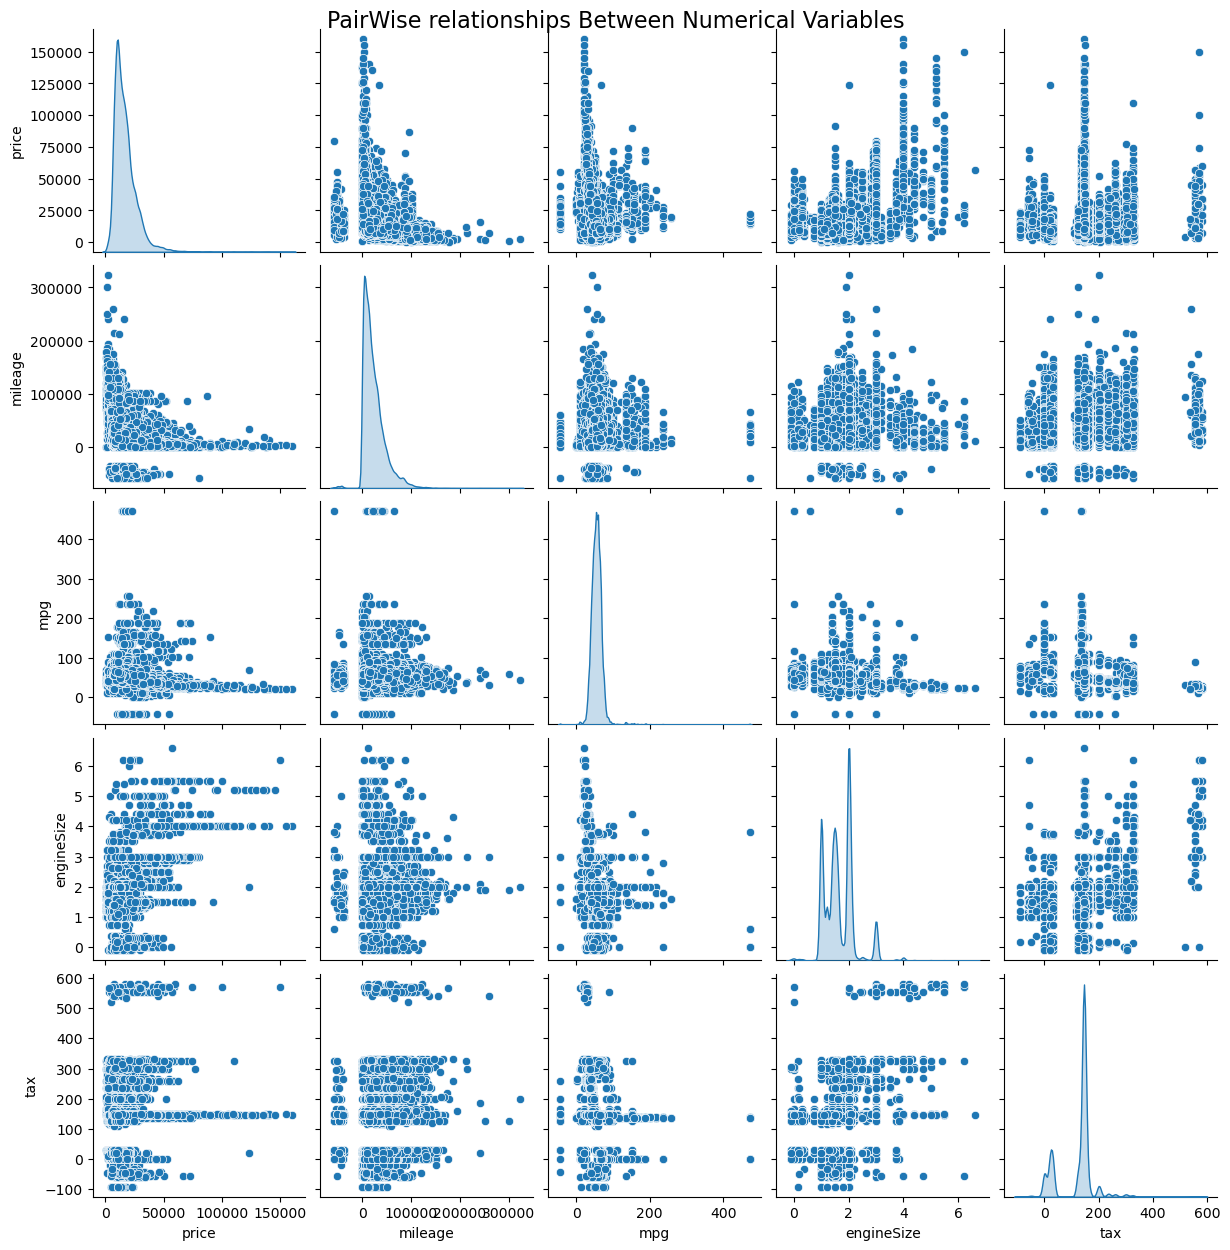

In [32]:
sns.pairplot(df_train[["price","mileage", "mpg", "engineSize", "tax"]], diag_kind="kde")
plt.suptitle("PairWise relationships Between Numerical Variables",
             y=1,
             fontsize=16)
plt.show()

Even in raw data, we can see **negative correlation** between `price` and `mileage`, and **positive correlation** between `price` and `engine size`. Noise and **missing values** reduce clarity, but initial **trends** are observable.

<h4 style="color: #00E676;">Multivariate Analysis - FuelType, Mileage, Price</h4> 

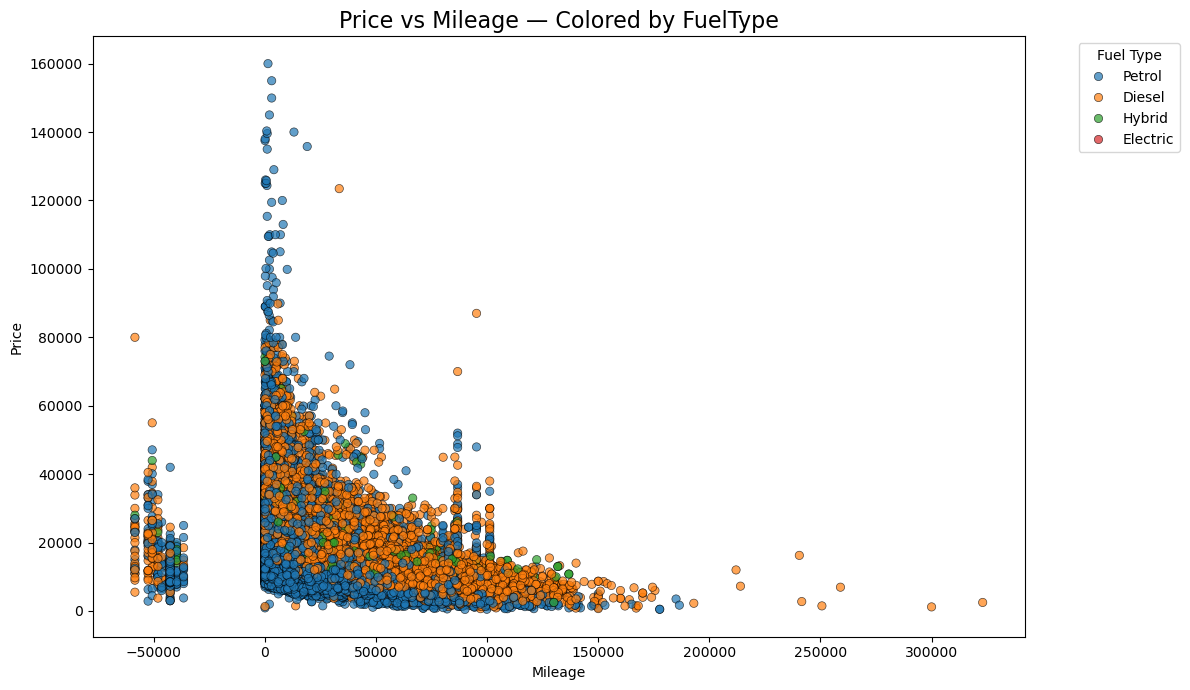

In [33]:
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="fuelType",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by FuelType", fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The analysis **confirms that depreciation** (the negative relationship between `Price` and `Mileage`) holds universally for the most common fuel types (Diesel and Petrol). However, `FuelType` acts as a shifting factor: Hybrid and (to a lesser extent) Electric cars are concentrated in the low `Mileage` and high Price area, indicating they are **newer** and **more expensive models** in the dataset. This pattern justifies the **importance** of including both `Mileage` (continuous) and `Fuel Type` (categorical) in the predictive model.

<h4 style="color: #00E676;">Multivariate Analysis - Brand, Mileage, Price</h4> 

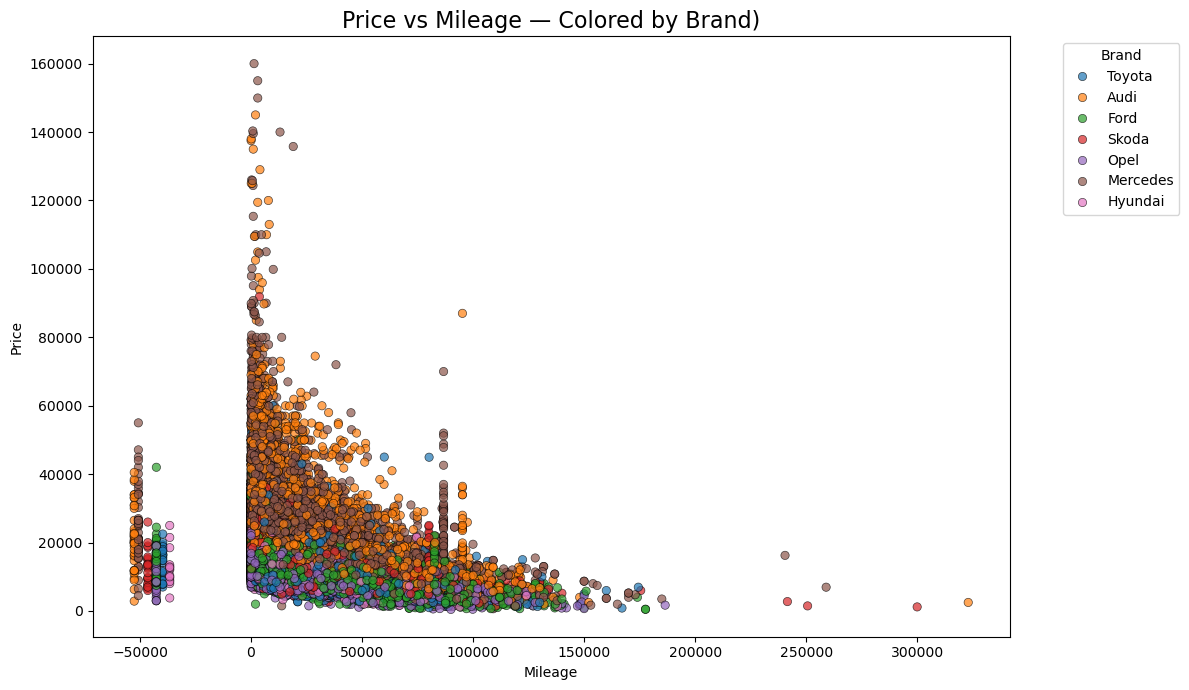

In [34]:
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="Brand",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by Brand)",
          fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The analysis reveals **significant segmentation** and **vertical stratification** by **brand**. While all `brands` adhere to the general principle of depreciation (`Price` decreases with `Mileage`), **premium brands** such as `Audi`, `BMW`, and `Mercedes` form **distinct**, **higher clusters**, showing consistently **higher prices** than mass-market brands like `Ford`, `Toyota`, and `Vw` at any given mileage point. This confirms that `Brand` is a **powerful categorical feature** whose market segment is **highly correlated** with the initial price and the retained value throughout the vehicle's lifespan, necessitating its inclusion via one-hot encoding in the model.

<h4 style="color: #00E676;">Multivariate Analysis - Price vs Year - Color=fuelType</h4> 

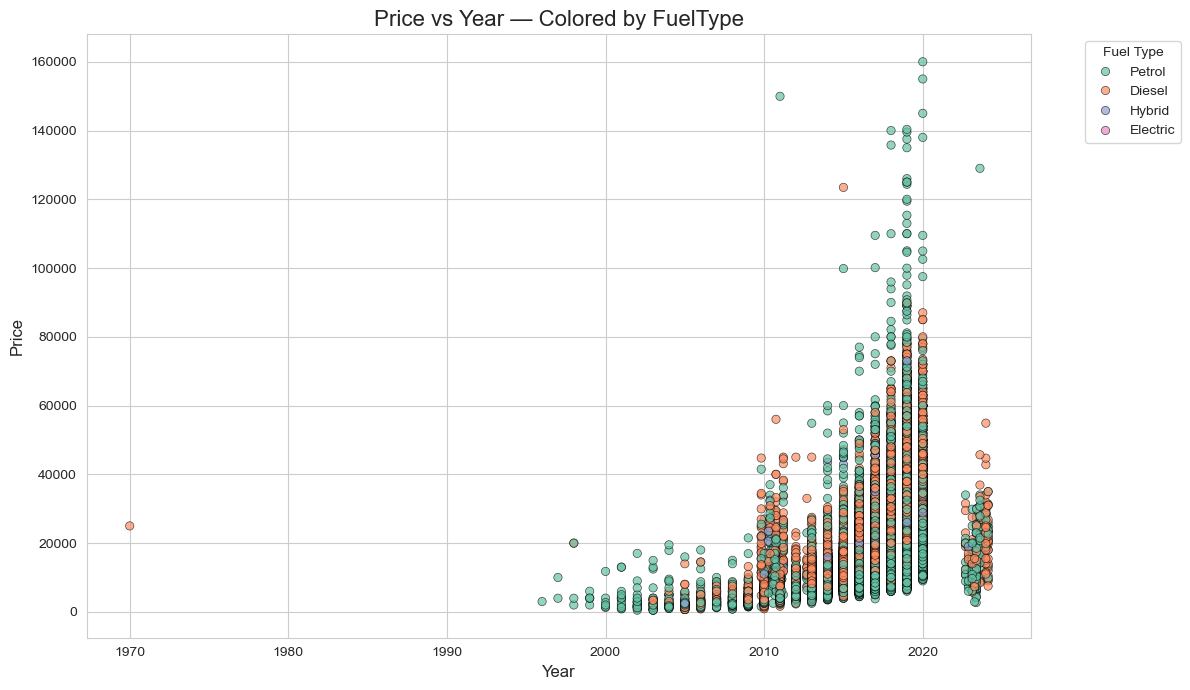

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",              
    y="price",                
    hue="fuelType",           
    palette="Set2",             
    alpha=0.7,                 
    edgecolor="k"            
)

# Titles and labels
plt.title("Price vs Year — Colored by FuelType",
          fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The analysis confirms the **strong positive relationship** between `Year` and `Price` (newer cars are more expensive) across all fuel types. `FuelType` causes a **horizontal** and **vertical segmentation**: `Petrol` and `Diesel` cars span the entire time range, representing the **full depreciation curve**. In contrast, `Hybrid` and `Electric` vehicles clustes heavily towards the most recent years (high Year values), commanding **higher baseline prices** than their conventional counterparts at the same age. This confirms that both the continuous variable `Year` and the categorical variable `FuelType` are **essential predictors** of the vehicle's value.

<h4 style="color: #00E676;">Multivariate Analysis - Price vs Year - Color= Brand</h4> 

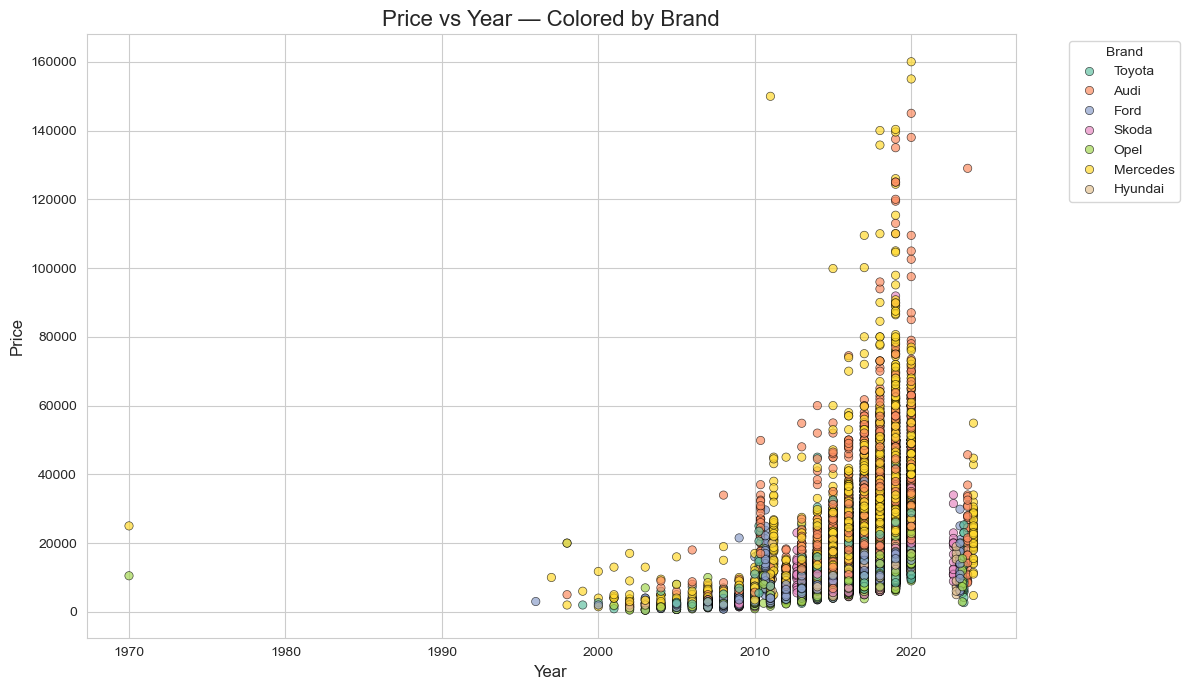

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",                
    y="price",                 
    hue="Brand",             
    palette="Set2",           
    alpha=0.7,                 
    edgecolor="k"               
)


plt.title("Price vs Year — Colored by Brand", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The analysis shows a clear **stratification** of **prices** by `brand`, confirming the **premium status** of certain manufacturers. All brands adhere to the fundamental rule that `Price` increases with `Year` (newer cars are more expensive). However, **Premium Brands** (`Audi`, `BMW`, `Mercedes`) form distinct, higher price clusters at any given year compared to **Mass-Market Brands** (`Ford`, `Toyota`, `VW`, `Opel`, `Hyundai`). This strong vertical separation confirms that `Brand` is a **critical predictor** of value, determining the `price` segment and baseline value of the vehicle regardless of its age. The **difference** in price retention and the ceiling price for the newer models are **visibly highest**for the premium group.

<h4 style="color: #00E676;">Pairplot to Brand</h4> 

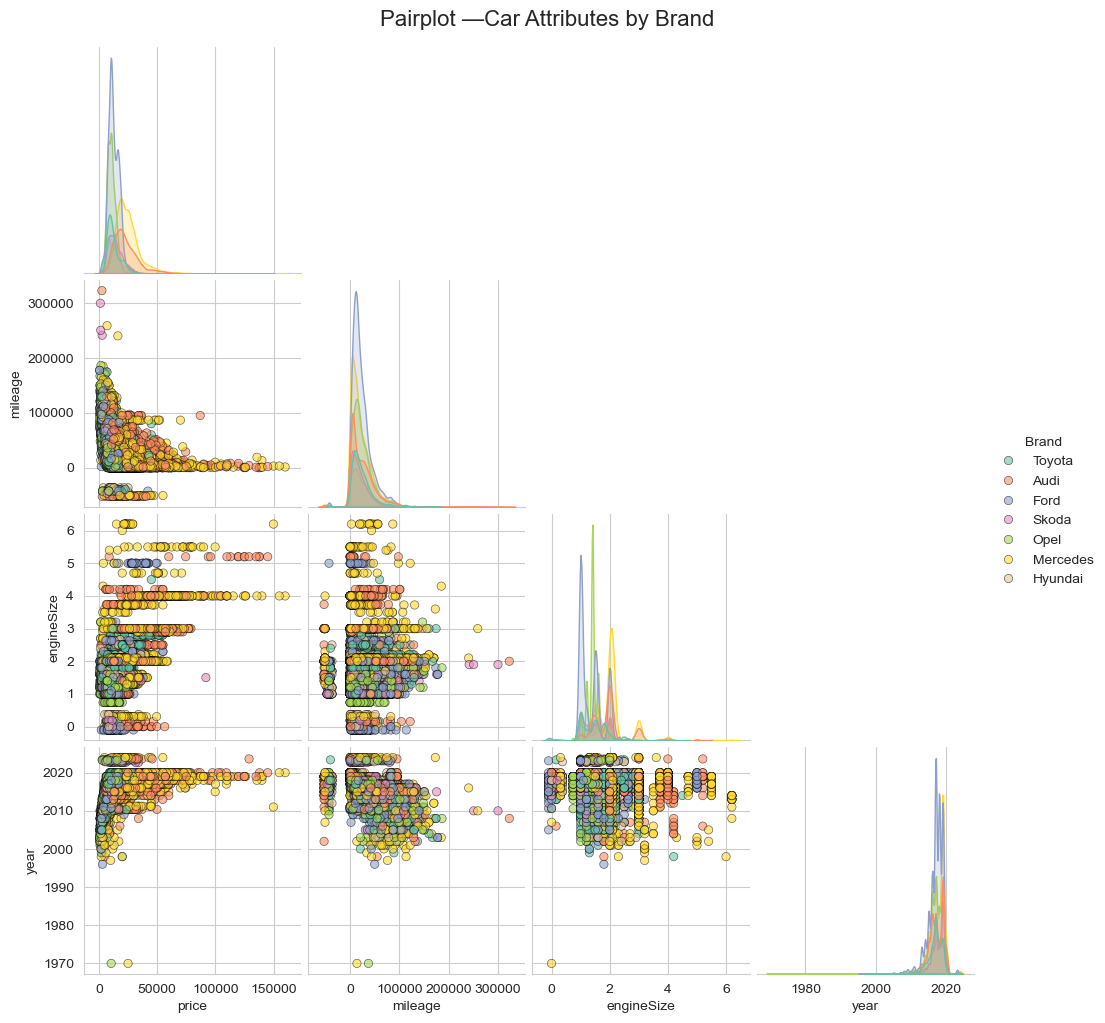

In [37]:
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="Brand",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)
plt.suptitle("Pairplot —Car Attributes by Brand",
             y=1.02,
             fontsize=16)
plt.show()

The pairplot **validates all previous multivariate** findings simultaneously. It confirms the **strong positive correlations** for Price vs. Year and `Price` vs. `Engine Size` and the **negative correlation** for `Price` vs. `Mileage`. Critically **Premium Brands** `Audi` `BMW` `Mercedes` consistently occupy the **highest** price and engine size clusters while Mass-Market Brands concentrate in the **lower ranges**. The plot confirms `Brand` is the **most significant categorical differentiator** dictating the expected distribution and maximum values for all other key numerical attributes.

<h4 style="color: #00E676;">Price distribution by Brand</h4> 

C:\Users\danie\AppData\Local\Temp\ipykernel_11152\381057388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


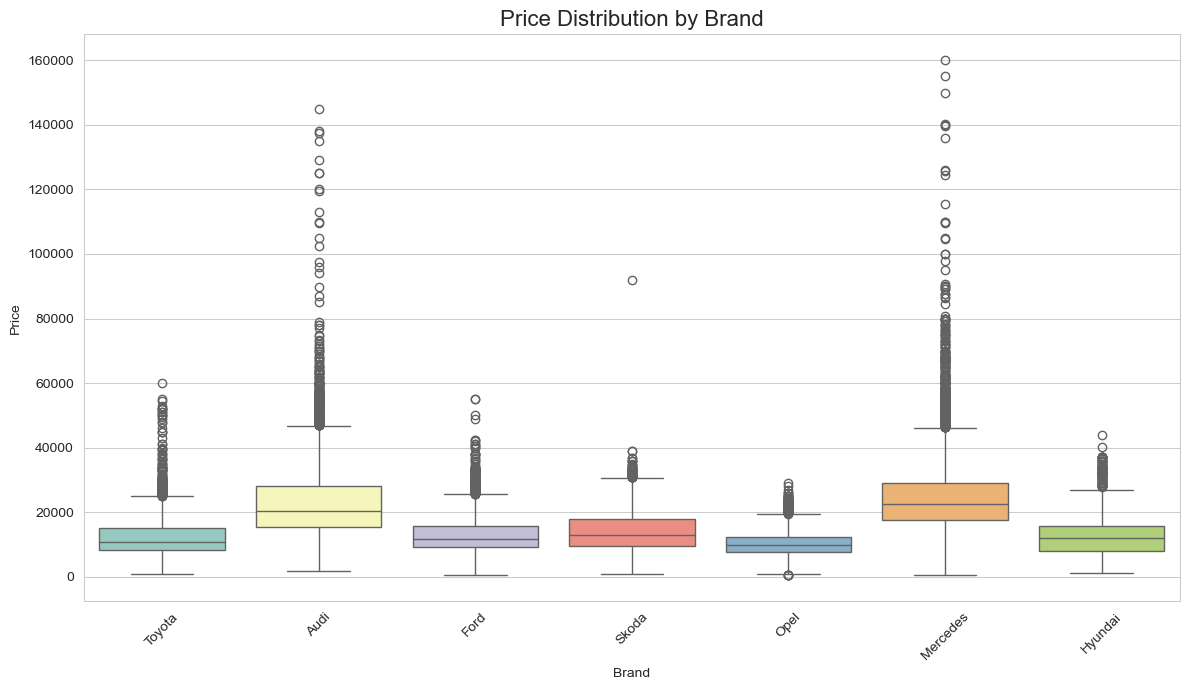

In [38]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.boxplot(
    data=df_filtered,
    x="Brand",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Brand", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis shows **strong vertical stratification** of **median prices**: Premium Brands (`Mercedes`, `Audi`, `BMW`) exhibit the **highest median prices** and generally **have larger Interquartile Ranges** (IQR), indicating **higher price variability** and **value retention**. Mass-Market Brands (`Ford`, `VW`, `Toyota`, `Skoda`, `Opel`, `Hyundai`) form the **lower price** tier, with significantly **lower median prices** and generally smaller IQRs. All `brands` display a possible large number of **outliers** (individual points above the upper whisker), confirming the presence of **high-value**, **high-price vehicles** (e.g., performance or rare models) even within the standard brands. This strong **segmentation validates** the decision to use one-hot encoding on the `Brand` feature in the predictive model.

<h4 style="color: #00E676;">Price Distribution by Transmission</h4> 

C:\Users\danie\AppData\Local\Temp\ipykernel_11152\4222811036.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


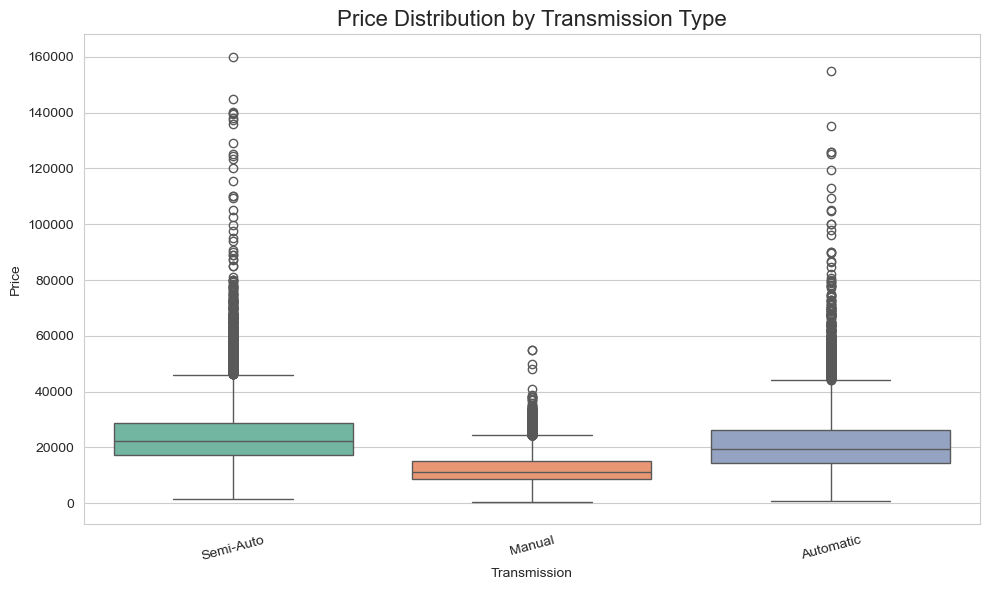

In [39]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.boxplot(
    data=df_filtered,
    x="transmission",
    y="price",
    palette="Set2"
)

plt.title("Price Distribution by Transmission Type", fontsize=16)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The analysis confirms a **strong vertical stratification** in median prices: `Automatic` cars exhibit the **highest median price**, followed closely by `Semi-Auto`, while `Manual` cars have the **lowest median price**. Both automatic and `semi-automatic` `transmissions` display a greater `price` variability (larger interquartile range and longer whiskers), indicating they cover a **wider range** of **high-end** and **luxury vehicles** compared to `manual transmissions`. This segmentation is a **fundamental finding of the EDA**, underscoring why `transmission` type is a **critical categorical feature** for the predictive model.

<h4 style="color: #00E676;">Price Distribution by FuelType</h4> 

C:\Users\danie\AppData\Local\Temp\ipykernel_11152\4062865563.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


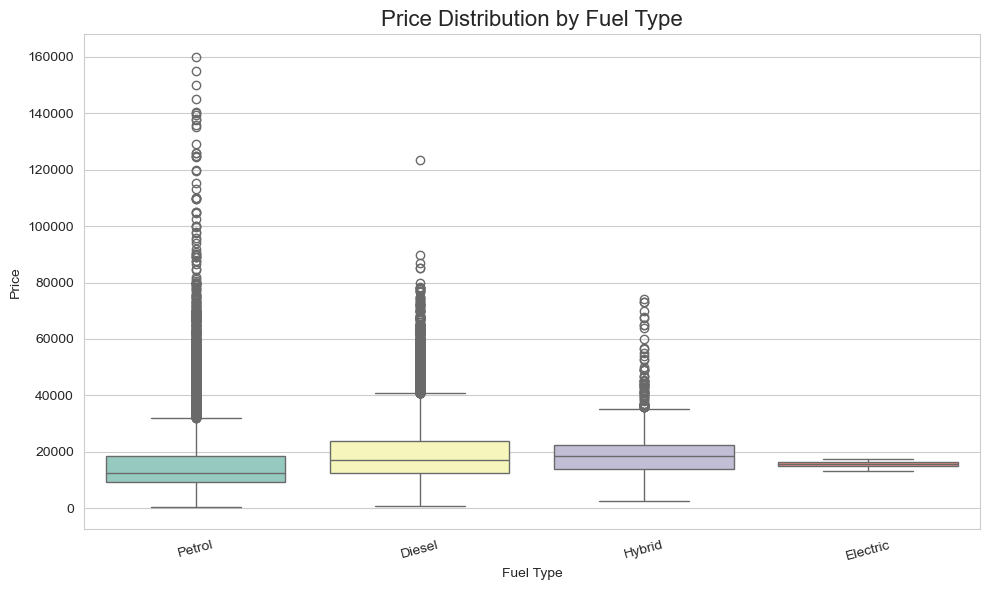

In [40]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_filtered,
    x="fuelType",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The box plot of `Price` segmented by `Fuel Type` confirms **significant differences** in market value driven by **technology**. The analysis shows that `Hybrid` and `Electric` vehicles exhibit the **highest median prices** compared to the conventional `Diesel` and `Petrol` groups. `Diesel` cars occupy a mid-to-high price range, suggesting they retain **higher value** than petrol cars on average, which typically have the **lowest median price**. All segments display a similar spread of possible **outliers**, confirming the presence of high-value specialty vehicles across all `fuel types`. This segmentation validates `Fuel Type` as a critical categorical feature for predicting vehicle price.

<h4 style="color: #00E676;">Key Car Attributes by Transmission</h4> 

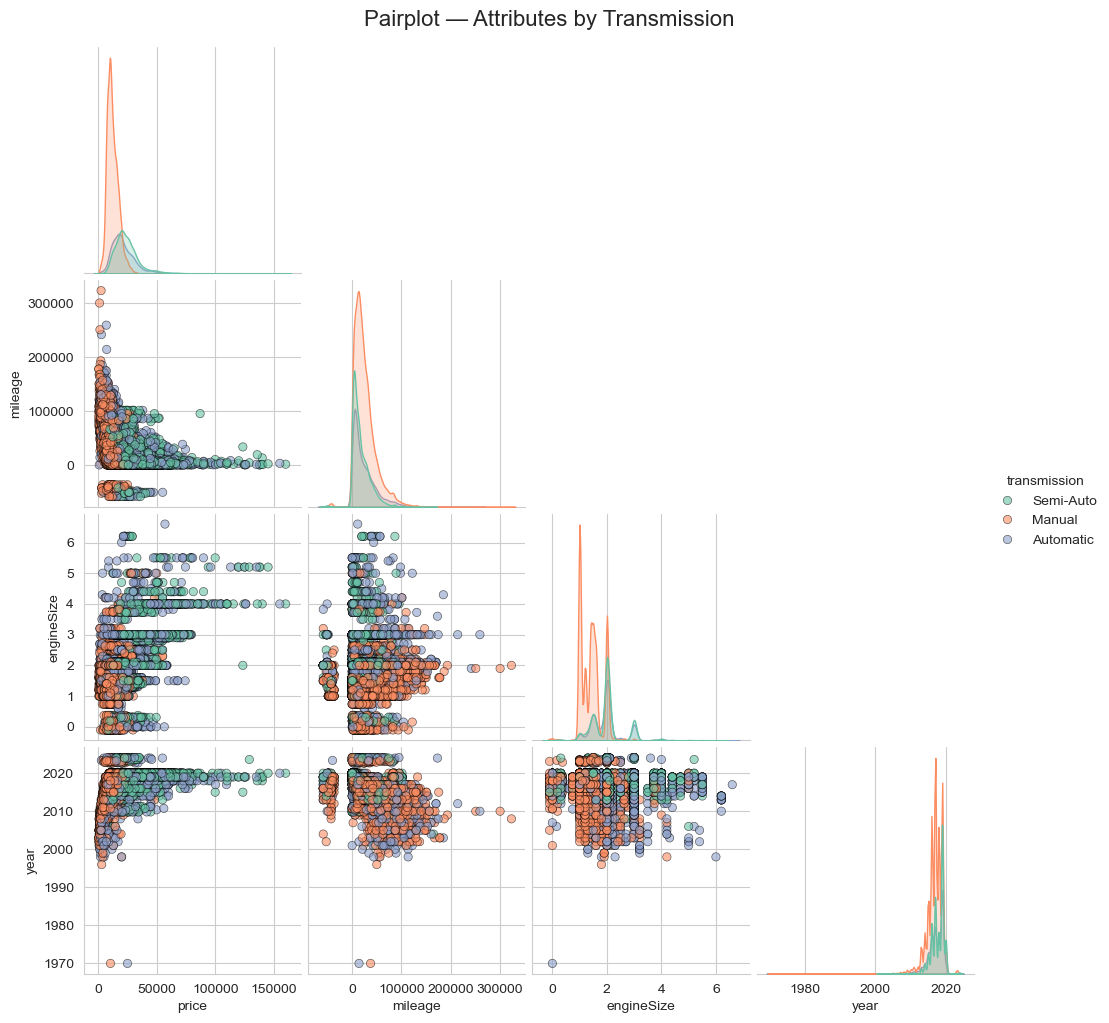

In [41]:
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="transmission",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Transmission", y=1.02, fontsize=16)
plt.show()

The pairplot provides comprehensive confirmation that `Transmission` is a **major segmenting factor** in the used car market, influencing the **distribution and relationships** of all other key attributes. `Automatic` and `Semi-Auto` vehicles consistently form higher value clusters across the plots: they dominate the highest price ranges (`Price` vs. `Year/EngineSize`) and are strongly associated with larger `Engine Sizes` (`EngineSize` vs. `Mileage/Price`). In contrast, **Manual** vehicles typically occupy the **lower to mid-range values** in `Price` and `Engine Size`, while their mileage is spread more widely across all years. This **stratification** confirms that the **complexity** and market preference for **automatic transmissions** set a fundamentally higher baseline value and are linked to more expensive, powerful vehicles.

<h4 style="color: #00E676;">Key Car Attributes by Fuel Type</h4> 

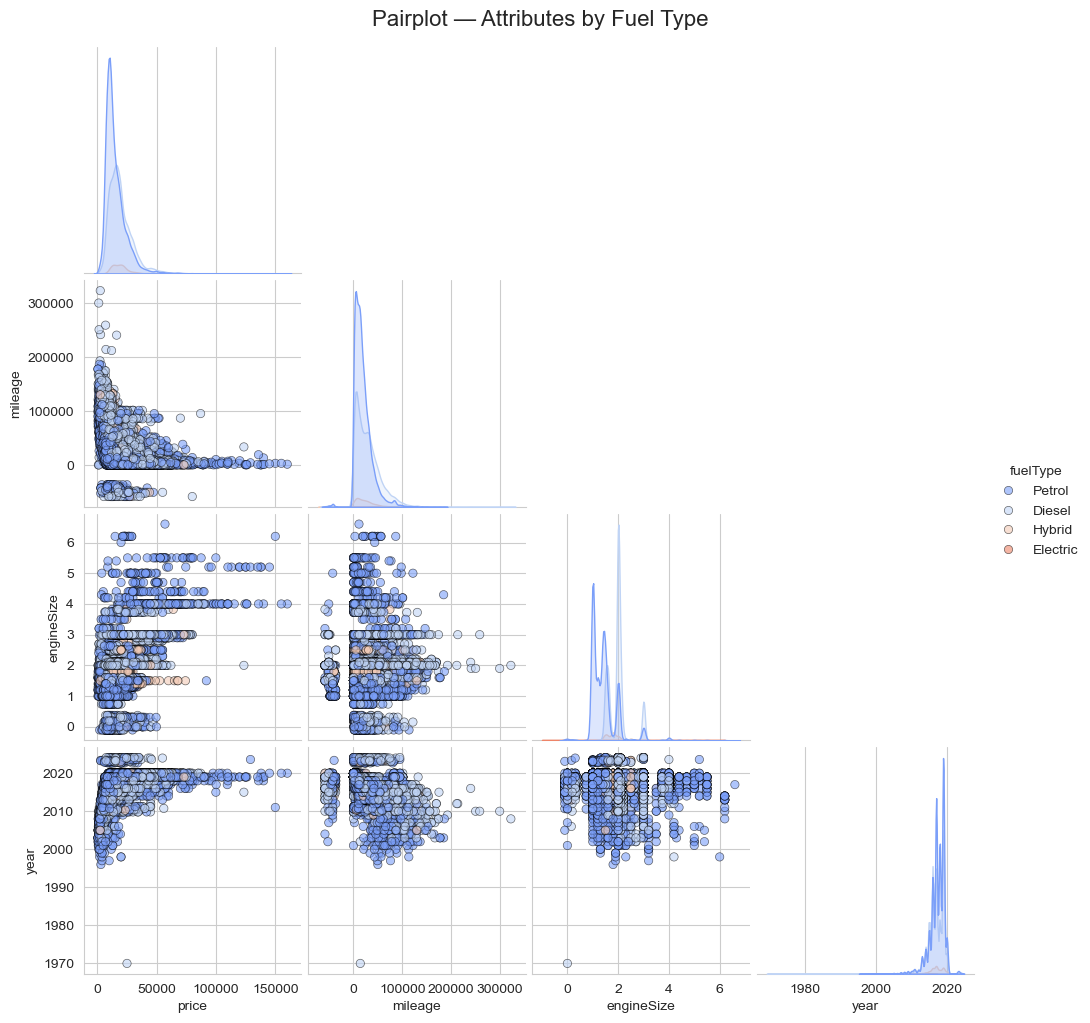

In [42]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="fuelType",
    palette="coolwarm",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Fuel Type", y=1.02, fontsize=16)
plt.show()

The pairplot provides a comprehensive view of how` Fuel Type` **segments** the vehicle market based on **value**, **age**, and **engine characteristics**. `Hybrid` and `Electric` vehicles consistently form distinct clusters at the **highest prices** (`Price` vs. `Year/Mileage`) and are heavily concentrated in the newest years (high Year values). Critically, they also cluster around the **smallest engine sizes** (`Engine Size` plots). `Petrol` and `Diesel` vehicles, representing the **conventional market**, span the entire range of values and are associated with a broader spectrum of `engine sizes` and `prices`. This segmentation **confirms** that `Fuel Type` is a **primary categorical differentiator**, separating the established depreciation curve of conventional cars from the **high-value**, **low-mileage** profile of newer, alternative-fuel technologies.

<h4 style="color: #00E676;">Correlation Matrix before cleaning the data</h4> 

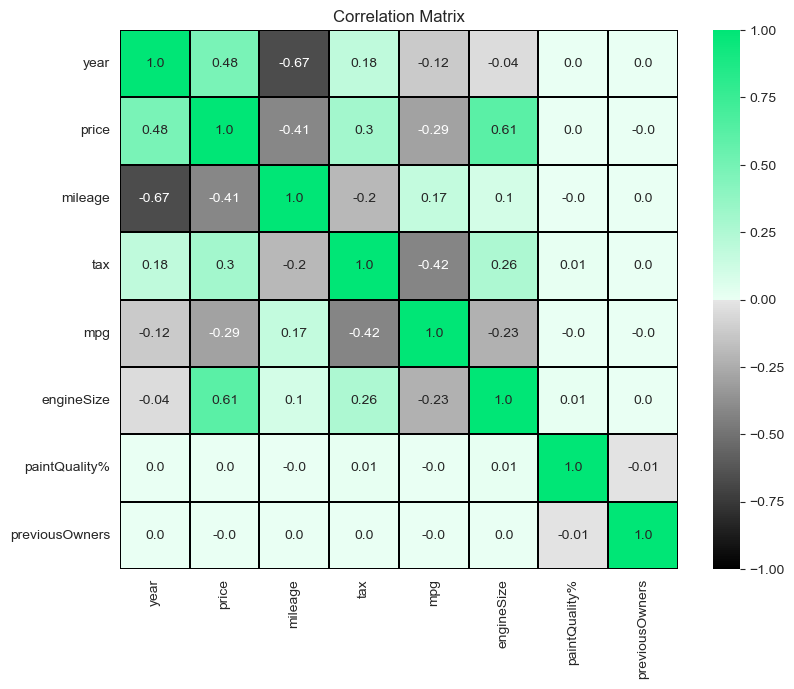

In [43]:
num = df_train.select_dtypes(include="number").drop(columns=["carID", "hasDamage"], errors="ignore")
corr = num.corr(numeric_only=True).round(2)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

The matrix immediately confirms the **strongest linear relationships** with the **target variable**, `price`. `engineSize` exhibits the **strongest positive correlation** ($\approx$ 0.61). `Year` follows closely with a **strong** ($\approx$ 0.48), indicating that newer cars are **significantly more expensive**. The only notable **negative relationship** is with `mileage` ($\approx$ -0.41), confirming that higher mileage leads to a **lower price** (depreciation). **High** inter-feature **correlations**, such as between `engineSize` and `tax` ($\approx$ 0.26), also highlight potential **multicollinearity issues** that might require attention during model selection (e.g., using regularization techniques). Overall, the **heatmap validates** `Year` and `engineSize` as the **most influential numerical predictors** of price.

<h1 style="color: #00E676;">2. Data Preprocessing</h1>

In [44]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [45]:
df_train.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.00,74482.00,75973.00,74510.00,68069.00,68047.00,74457.00,74449.00,74423.00,74425.0
mean,37986.00,2017.10,16881.89,23004.18,120.33,55.15,1.66,64.59,1.99,0.0
std,21931.66,2.21,9736.93,22129.79,65.52,16.50,0.57,21.02,1.47,0.0
min,0.00,1970.00,450.00,-58540.57,-91.12,-43.42,-0.10,1.64,-2.35,0.0
25%,18993.00,2016.00,10200.00,7423.25,125.00,46.30,1.20,47.00,1.00,0.0
50%,37986.00,2017.00,14699.00,17300.00,145.00,54.30,1.60,65.00,2.00,0.0
75%,56979.00,2019.00,20950.00,32427.50,145.00,62.80,2.00,82.00,3.00,0.0
max,75972.00,2024.12,159999.00,323000.00,580.00,470.80,6.60,125.59,6.26,0.0


In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           75973 non-null  object 
 2   model           75973 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    75973 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        75973 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [47]:
df_train_new = df_train.copy()

In [48]:
df_train_new.drop(columns=["hasDamage"], inplace=True)
df_train_new.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000


**Dropping** the `HasDamage` column, since all known values are `0` and the variable has **no relevance** for the model.

<h2 style="color: #00E676;">2.1. Solve inconsistencies</h2>

<h4 style="color: #00E676;">Convert to N/A - Mileage, paintquality%</h4> 

In [49]:
df_train_new["mileage"] = df_train_new["mileage"].where(df_train_new["mileage"] >= 0)
df_train_new["paintQuality%"] = df_train_new["paintQuality%"].where(df_train_new["paintQuality%"] <= 100)

<h4 style="color: #00E676;">Solve Mpg</h4> 

In [50]:
mpg = pd.to_numeric(df_train_new["mpg"], errors="coerce")
brand = df_train_new["Brand"].astype(str).str.strip().str.casefold()
model = df_train_new["model"].astype(str).str.strip().str.casefold()

bmw_mask = brand.isin(["bmw","bm","mw"])
negative_mpg  = mpg < 0
valid = bmw_mask & (mpg >= 0)
med_por_modelo = mpg[valid].groupby(model[valid]).median()
med_por_modelo

model
1 serie      62.10
1 series     58.90
2 serie      51.35
2 series     52.30
3 serie      56.50
3 series     54.30
4 serie      60.10
4 series     55.40
5 serie      55.40
5 series     60.10
6 serie      49.60
6 series     49.60
7 serie      42.00
7 series     42.20
8 serie      39.80
8 series     33.60
i           470.80
i3          470.80
i8          134.50
m            34.00
m2           29.10
m3           34.00
m4           34.00
m5           26.90
m6           28.50
nan          53.30
x            47.90
x1           57.60
x2           47.90
x3           54.30
x4           42.80
x5           37.70
x6           37.20
x7           31.40
z            41.50
z3           35.30
z4           38.70
Name: mpg, dtype: float64

In [51]:
to_fix = bmw_mask & negative_mpg
df_train_new.loc[to_fix, "mpg"] = model.map(med_por_modelo)
display(df_train_new.loc[to_fix, ["Brand","model","year","fuelType","engineSize","mpg"]].head(10))

,Brand,model,year,fuelType,engineSize,mpg
758,Bmw,X1,2019.0,Petrol,2.0,57.6
2545,Bmw,3 Series,2019.0,Petrol,2.0,54.3
5156,Bmw,2 Series,2020.0,Diesel,2.0,52.3
6306,Bmw,2 Series,2015.0,Petrol,3.0,52.3
7454,Bmw,X5,2016.0,Diesel,3.0,37.7
7577,Bmw,2 Series,2015.0,Petrol,2.0,52.3
9800,Bmw,1 Series,2019.0,Diesel,2.0,58.9
10107,Bmw,3 Series,2017.0,Diesel,2.0,54.3
10381,Bmw,X1,2016.0,Diesel,2.0,57.6
11235,Bmw,3 Series,2014.0,Diesel,3.0,54.3


<h4 style="color: #00E676;">Convert to positive values - Tax and PreviousOwners</h4> 

In [52]:
df_train_new["tax"] = df_train_new["tax"].mask(df_train_new["tax"] < 0, -df_train_new["tax"])
df_train_new["previousOwners"] = df_train_new["previousOwners"].mask(df_train_new["previousOwners"] < 0, -df_train_new["previousOwners"])
df_train_new["previousOwners"] = df_train_new["previousOwners"].round()
df_train_new.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.0
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,2.0
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.0


<h4 style="color: #00E676;">Convert to positive values - EngineSize</h4> 

In [53]:
engineSize = pd.to_numeric(df_train_new["engineSize"], errors="coerce")
brand = df_train_new["Brand"].astype(str).str.strip().str.casefold()
model = df_train_new["model"].astype(str).str.strip().str.casefold()

engineSize_mask = brand.isin(["ford","for","ord","or"])
negative_engineSize = engineSize < 0
to_fix_eng = engineSize_mask & negative_engineSize

valid = engineSize_mask & (engineSize >= 0)
med_per_model = engineSize[valid].groupby(model[valid]).median()
med_per_model

model
b-ma                     1.0
b-max                    1.4
c-ma                     1.5
c-max                    1.5
ecospor                  1.0
ecosport                 1.0
edg                      2.0
edge                     2.0
escort                   1.8
fiest                    1.0
fiesta                   1.0
focu                     1.5
focus                    1.5
fusion                   1.4
galax                    2.0
galaxy                   2.0
grand c-ma               1.5
grand c-max              1.5
grand tourneo connec     1.5
grand tourneo connect    1.5
k                        1.2
ka                       1.2
ka+                      1.2
kug                      2.0
kuga                     2.0
monde                    2.0
mondeo                   2.0
mustang                  5.0
nan                      1.2
puma                     1.0
ranger                   3.2
s-ma                     2.0
s-max                    2.0
streetka                 1.6
tourneo 

In [54]:
df_train_new.loc[to_fix_eng, "engineSize"] = model.map(med_per_model)
display(df_train_new.loc[to_fix_eng, ["Brand","model","year","fuelType","engineSize","mpg"]].tail(50))

,Brand,model,year,fuelType,engineSize,mpg
29165,Ford,Focus,2019.000000,Petrol,1.5,NaN
29636,Ford,Fiesta,2017.000000,Nan,1.0,65.7
30083,Ford,Fiesta,2023.116964,Petrol,1.0,65.7
32053,Ord,Nan,2015.000000,Diesel,1.2,74.3
32120,Ford,Fiesta,2016.000000,Petrol,1.0,65.7
32231,Ford,Fiesta,2018.000000,Petrol,1.0,62.8
32253,Ford,Fiesta,2017.000000,Petrol,1.0,65.7
34126,Ford,Focus,2015.000000,Diesel,1.5,74.3
34606,Ford,Focu,2016.000000,Diesel,1.5,NaN
34643,Ford,Ecosport,2017.000000,Petrol,1.0,52.3


<h4 style="color: #00E676;">Remove Year > 2020</h4> 

In [55]:
df_train_new.shape

(75973, 13)

In [56]:
y = pd.to_numeric(df_train_new["year"], errors="coerce")
mask = (y <= 2020) | y.isna()
df_train_new = df_train_new.loc[mask].copy()
df_train_new.shape

(75615, 13)

<h4 style="color: #00E676;">Round Cols</h4> 

In [57]:
cols = ["mpg", "previousOwners", "mileage"]
df_train_new[cols] = df_train_new[cols].round(2)
df_train_new.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.42,2.0,63.0,4.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.90,1.5,50.0,1.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.90,1.5,56.0,4.0
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.70,1.0,50.0,2.0
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.80,1.5,97.0,3.0


The **.round(2) function** is applied to the `mpg`, `previousOwners`, and `mileage` columns to **round** their values to **two decimal** places, standardizing the **numerical** precision.

<h2 style="color: #00E676;">2.2. Digitalization Problems Solve</h2>

<h3 style="color: #00E676;">2.2.1. Brand </h3>

**Correction** of the **brand names** in the `Brand` column, with only the `N/A` **values remaining**.

In [58]:
df_train_new["Brand"] = df_train_new["Brand"].astype(str).str.strip()
brand_counts = df_train_new["Brand"].value_counts(dropna=False)
brand_counts

Brand
Ford        15358
Mercedes    11155
Vw           9924
Opel         8939
Bmw          7071
Audi         6993
Toyota       4431
Skoda        4120
Hyundai      3189
Nan          1513
Ord           319
For           303
Ercedes       235
Mercede       222
W             207
V             202
Ope           187
Pel           180
Mw            147
Udi           147
Aud           145
Bm            140
Oyota          93
Koda           82
Skod           81
Toyot          74
Yundai         68
Hyunda         64
Ercede          7
Or              7
Pe              4
Yunda           3
Ud              3
Kod             2
Name: count, dtype: int64

In [59]:
df_train_new["Brand_clean"] = df_train_new["Brand"].astype(str).str.strip().str.lower()

df_train_new.loc[df_train_new["Brand_clean"].isin(["ercece","mercede","ercedes", "ercede"]), "Brand_clean"] = "mercedes"
df_train_new.loc[df_train_new["Brand_clean"].isin(["for","ord","or"]), "Brand_clean"] = "ford"
df_train_new.loc[df_train_new["Brand_clean"].isin(["bmw","mw","bm"]), "Brand_clean"] = "bmw"
df_train_new.loc[df_train_new["Brand_clean"].isin(["ope","pel","pe"]), "Brand_clean"] = "opel"
df_train_new.loc[df_train_new["Brand_clean"].isin(["vw","w","v"]), "Brand_clean"] = "vw"
df_train_new.loc[df_train_new["Brand_clean"].isin(["aud","udi","ud"]), "Brand_clean"] = "audi"
df_train_new.loc[df_train_new["Brand_clean"].isin(["oyota","toyot"]), "Brand_clean"] = "toyota"
df_train_new.loc[df_train_new["Brand_clean"].isin(["koda","skod","kod"]), "Brand_clean"] = "skoda"
df_train_new.loc[df_train_new["Brand_clean"].isin(["hyunda","yundai","yunda"]), "Brand_clean"] = "hyundai"


In [60]:
new_brand_counts = df_train_new["Brand_clean"].value_counts(dropna=False)
new_brand_counts

Brand_clean
ford        15987
mercedes    11619
vw          10333
opel         9310
bmw          7358
audi         7288
toyota       4598
skoda        4285
hyundai      3324
nan          1513
Name: count, dtype: int64

<h3 style="color: #00E676;">2.2.2. Fuel Type </h3>

**Correct** the **names** of the **different fuel types** in the `Fueltype` column, leaving only the `N/A` **values remaining**.

In [61]:
df_train_new["fuelType"] = df_train_new["fuelType"].astype(str).str.strip()
fuel_Type = df_train_new["fuelType"].value_counts(dropna=False)
fuel_Type

fuelType
Petrol      39330
Diesel      29531
Hybrid       2132
Nan          1501
Petro         814
Etrol         807
Iesel         619
Diese         595
Other         155
Hybri          45
Ybrid          40
Etro           18
Iese           11
Othe            6
Ther            6
Electric        4
Ybri            1
Name: count, dtype: int64

In [62]:
df_train_new["fuelType_clean"] = df_train_new["fuelType"].astype(str).str.strip().str.lower()

df_train_new.loc[df_train_new["fuelType_clean"].isin(["petro","etrol","etro"]), "fuelType_clean"] = "petrol"
df_train_new.loc[df_train_new["fuelType_clean"].isin(["iesel","diese","iese"]), "fuelType_clean"] = "diesel"
df_train_new.loc[df_train_new["fuelType_clean"].isin(["hybri","ybrid","ybri"]), "fuelType_clean"] = "hybrid"
df_train_new.loc[df_train_new["fuelType_clean"].isin(["othe","ther"]), "fuelType_clean"] = "other"

In [63]:
new_fuelType_counts = df_train_new["fuelType_clean"].value_counts(dropna=False)
new_fuelType_counts

fuelType_clean
petrol      40969
diesel      30756
hybrid       2218
nan          1501
other         167
electric        4
Name: count, dtype: int64

<h3 style="color: #00E676;">2.2.3. Transmission </h3>

**Correct** the **names** of the **different transmission types** in the `transmission` column, leaving only the `N/A` **values remaining**

In [64]:
df_train_new["transmission"] = df_train_new["transmission"].astype(str).str.strip()
transmission_counts = df_train_new["transmission"].value_counts(dropna=False)
transmission_counts

transmission
Manual       39829
Semi-Auto    16102
Automatic    14509
Nan           1519
Anual          815
Manua          768
Unknown        701
Semi-Aut       343
Emi-Auto       342
Automati       314
Utomatic       313
Unknow          18
Nknown          13
Anua            12
Utomati          6
Emi-Aut          5
Other            5
Nknow            1
Name: count, dtype: int64

In [65]:
df_train_new["transmission_clean"] = df_train_new["transmission"].astype(str).str.strip().str.lower()

df_train_new.loc[df_train_new["transmission_clean"].isin(["anual","manua","anua"]), "transmission_clean"] = "manual"
df_train_new.loc[df_train_new["transmission_clean"].isin(["semi-aut","emi-auto","emi-aut"]), "transmission_clean"] = "semi-auto"
df_train_new.loc[df_train_new["transmission_clean"].isin(["automati","utomatic","utomati"]), "transmission_clean"] = "automatic"
df_train_new.loc[df_train_new["transmission_clean"].isin(["unknow","nknown", "nknow"]), "transmission_clean"] = "unknown"

In [66]:
new_transmission_counts = df_train_new["transmission_clean"].value_counts(dropna=False)
new_transmission_counts

transmission_clean
manual       41424
semi-auto    16792
automatic    15142
nan           1519
unknown        733
other            5
Name: count, dtype: int64

<h3 style="color: #00E676;">2.2.4. Model - Correction model names with RapidFuzz </h3>

A normalization function `(_norm)` was developed to **standardize strings** before correction, converting them to **lowercase**, **special characters**, and **extra spaces** to ensure **consistent comparisons**.

Then, the `find_best_in_catalog` function was created to check whether a **value exists** in the **canonical catalog** and, if not, apply approximate **matching** (fuzzy matching) using the `RapidFuzz` library. The algorithms `token_set_ratio` and `token_sort_ratio` were used, returning the most **similar value**, its similarity score, and the method applied. Two `thresholds` (threshold_high and threshold_low) were also defined to **control** the **confidence level** of accepted matches.

Based on this function, a **canonical catalog** of models was built for **each brand**, considering only models with a frequency above a brand-specific limit defined in `threshold_dict`. For each brand, the function was applied within its ***respective catalog**, and valid matches (`token_set` or `token_sort`) were stored in a **mapping** dictionary (`model_cleaning_dict`).

Finally, the `model_clean_fuzzy` column was created to apply the **automatic corrections** stored in the **dictionary**, **keeping** the **original value** when **no match** was found. This process ensured the standardization of model names within each brand,** reducing spelling errors** and **inconsistencies**.

In [67]:
def _norm(s):
    if s is None or (isinstance(s, float) and pd.isna(s)):
        return ""
    s = str(s).casefold().strip()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"[/_.\-]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def find_best_in_catalog(word, catalog_list, threshold_high=92, threshold_low=85):
    if word is None or (isinstance(word, float) and pd.isna(word)):
        return (word, 0.0, "null")
    if not catalog_list:
        return (word, 0.0, "no_catalog")

    word_norm = _norm(word)

    #canonical representation of the catalog
    norm_map = {_norm(c): c for c in catalog_list}

    #Already exists in the catalog? Don’t change it.
    if word_norm in norm_map:
        return (word, 100.0, "exact_in_catalog")

    #perform fuzzy matching against the catalog”
    best, score, _ = process.extractOne(word_norm, catalog_list, scorer=fuzz.token_set_ratio)
    method = "token_set"

    best2, score2, _ = process.extractOne(word_norm, catalog_list, scorer=fuzz.token_sort_ratio)
    if score2 > score:
        best, score, method = best2, score2, "token_sort"

    if score >= threshold_high:
        return (best, float(score), method)
    elif score >= threshold_low:
        return (best, float(score), method)  # Acceptable, but not high
    else:
        return (best, float(score), "review")

In [68]:
df_train_new["model_clean"] = df_train_new["model"].str.strip().str.lower().replace(r"[^a-z0-9]+", " ", regex=True)
df_train_new["brand_model_clean"] = df_train_new["Brand_clean"] + "_" + df_train_new["model_clean"]

In [69]:
for brand in df_train_new["Brand_clean"].unique():
    
    print(f"brand={brand}")

    df_brand_f = df_train_new[df_train_new["Brand_clean"].eq(brand)].copy()
    
    freq = (
        df_brand_f
          .dropna(subset=["model_clean"])
          .groupby("model_clean")
          .size()
          .reset_index(name="count")
          .sort_values(by="count", ascending=False)
    )

freq

brand=vw
brand=toyota
brand=audi
brand=ford
brand=bmw
brand=skoda
brand=opel
brand=mercedes
brand=hyundai
brand=nan


,model_clean,count
48,focus,154
28,c class,97
46,fiesta,73
58,golf,68
94,polo,46
...,...,...
125,tiguan allspace,1
142,x6,1
144,yari,1
147,yeti outdoo,1


In [70]:
threshold_dict = {
    "ford": 139,
    "vw": 40,
    "opel": 66,
    "mercedes": 128,
    "bmw": 66,
    "audi": 219,
    "toyota": 34,
    "skoda": 86,
    "hyundai": 70,
}

In [71]:
model_cleaning_dict = {}

for brand in df_train_new["Brand_clean"].unique():
    if brand != "nan":
        print(f"brand={brand}")
        df_brand_f = df_train_new[df_train_new["Brand_clean"].eq(brand)].copy()
        
        freq = (
            df_brand_f
              .dropna(subset=["model_clean"])
              .groupby("model_clean")
              .size()
              .reset_index(name="count")
              .sort_values(by="count", ascending=False)
        )
    
        # display(freq[freq["count"] > threshold_dict[brand]])
    
        most_freq_models = list(freq.loc[freq["count"].ge(threshold_dict[brand]), "model_clean"])
    
        for model in df_brand_f["model_clean"].unique():
            match, score, status = find_best_in_catalog(model, most_freq_models, threshold_high=92, threshold_low=85)
            if status in ("token_sort", "token_set"):
                model_cleaning_dict[brand + "_" + model] = match

df_train_new["model_clean_fuzzy"] = (
    df_train_new["brand_model_clean"]
        .map(model_cleaning_dict)
        .fillna(df_train_new["model_clean"])
        # .drop(["model_clean", "brand_model_clean"], axis=0)
)

brand=vw
brand=toyota
brand=audi
brand=ford
brand=bmw
brand=skoda
brand=opel
brand=mercedes
brand=hyundai


brand=toyota
brand=audi
brand=ford
brand=bmw
brand=skoda
brand=opel
brand=mercedes
brand=hyundai


In [72]:
df_train_new.loc[df_train_new["model_clean"] == 'octavi',:]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean,brand_model_clean,model_clean_fuzzy
894,48321,Skoda,Octavi,2019.0,13498,Semi-Auto,14245.0,Diesel,145.0,72.4,1.600000,65.0,2.0,skoda,diesel,semi-auto,octavi,skoda_octavi,octavia
1758,48041,Koda,Octavi,2019.0,15490,Semi-Auto,8952.0,Petrol,145.0,57.7,1.000000,37.0,3.0,skoda,petrol,semi-auto,octavi,skoda_octavi,octavia
2082,50003,Skoda,Octavi,2015.0,12995,Semi-Auto,63187.0,Diesel,145.0,55.4,2.000000,95.0,0.0,skoda,diesel,semi-auto,octavi,skoda_octavi,octavia
8593,49321,Skoda,Octavi,2019.0,16999,Semi-Auto,1297.0,Petrol,150.0,47.1,1.500000,NaN,0.0,skoda,petrol,semi-auto,octavi,skoda_octavi,octavia
15161,50232,Skoda,Octavi,2019.0,24990,Automatic,3955.0,Diesel,145.0,44.1,2.000000,33.0,1.0,skoda,diesel,automatic,octavi,skoda_octavi,octavia
15719,47795,Skoda,Octavi,2019.0,22495,Semi-Auto,4600.0,Petrol,145.0,36.7,2.000000,68.0,4.0,skoda,petrol,semi-auto,octavi,skoda_octavi,octavia
21251,48084,Skoda,Octavi,2016.0,9500,Manual,98420.0,Diesel,30.0,64.2,2.000000,50.0,4.0,skoda,diesel,manual,octavi,skoda_octavi,octavia
23274,47710,Skoda,Octavi,2019.0,14650,Automatic,13892.0,Petrol,145.0,57.7,1.000000,72.0,2.0,skoda,petrol,automatic,octavi,skoda_octavi,octavia
24354,48914,Skoda,Octavi,2014.0,8490,Automati,68000.0,Diesel,20.0,72.4,1.600000,68.0,3.0,skoda,diesel,automatic,octavi,skoda_octavi,octavia
38185,47669,Skoda,Octavi,2018.0,16795,Manual,18705.0,Diesel,145.0,62.8,2.000000,95.0,4.0,skoda,diesel,manual,octavi,skoda_octavi,octavia


In [73]:
df_train_new.drop(columns=["model_clean", "Brand", "model", "fuelType", "transmission"], inplace=True)
df_train_new.head()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,brand_model_clean,model_clean_fuzzy
0,69512,2016.0,22290,28421.0,NaN,11.42,2.0,63.0,4.0,vw,petrol,semi-auto,vw_golf,golf
1,53000,2019.0,13790,4589.0,145.0,47.90,1.5,50.0,1.0,toyota,petrol,manual,toyota_yaris,yaris
2,6366,2019.0,24990,3624.0,145.0,40.90,1.5,56.0,4.0,audi,petrol,semi-auto,audi_q2,q2
3,29021,2018.0,12500,9102.0,145.0,65.70,1.0,50.0,2.0,ford,petrol,manual,ford_fiesta,fiesta
4,10062,2019.0,22995,1000.0,145.0,42.80,1.5,97.0,3.0,bmw,petrol,manual,bmw_2 series,2 series


<h2 style="color: #00E676;">2.3. Missing Values</h2>

In [74]:
df_train_new.isnull().sum()

carID                    0
year                  1491
price                    0
mileage               1826
tax                   7867
mpg                   7890
engineSize            1510
paintQuality%         1881
previousOwners        1539
Brand_clean              0
fuelType_clean           0
transmission_clean       0
brand_model_clean        0
model_clean_fuzzy        0
dtype: int64

In [75]:
df_train_new.dropna(subset=["year"], inplace=True)
df_train_new.isnull().sum()

carID                    0
year                     0
price                    0
mileage               1796
tax                   7703
mpg                   7727
engineSize            1487
paintQuality%         1844
previousOwners        1512
Brand_clean              0
fuelType_clean           0
transmission_clean       0
brand_model_clean        0
model_clean_fuzzy        0
dtype: int64

Since most variables contain **missing values** that we do **not intend** to **remove**, the missing entries in the `year` variable were excluded, allowing this variable to be used as a reference to impute the **remaining missing values** in other features.

In [76]:
print(f"The dataset has {df_train_new.shape[0]} rows and {df_train_new.shape[1]} columns")

The dataset has 74124 rows and 14 columns


In [77]:
df_train_new.columns

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'paintQuality%', 'previousOwners', 'Brand_clean', 'fuelType_clean',
       'transmission_clean', 'brand_model_clean', 'model_clean_fuzzy'],
      dtype='object')

In [78]:
def fill_median(data, column, groupby_cols):
    data = data.copy()
    data[column] = data[column].fillna(
        data.groupby(groupby_cols)[column].transform("median")
    )
    return data

def fill_mean(data, column, groupby_cols):
    data = data.copy()
    data[column] = data[column].fillna(
        data.groupby(groupby_cols)[column].transform("mean")
    )
    return data

In [79]:
def clean_dataset(df_train_new, ref_year=2020):
    data = df_train_new.copy()

    #mileage
    if "mileage" in data.columns and "year" in data.columns:
        age = (ref_year - data["year"]).clip(lower=0)
        ok = data["mileage"].notna() & data["year"].notna() & (age > 0)

        rate = data.loc[ok, "mileage"] / age.loc[ok]

        r_model  = rate.groupby(data.loc[ok, "model_clean_fuzzy"]).mean()
        r_brand  = rate.groupby(data.loc[ok, "Brand_clean"]).mean()
        r_global = rate.median()

        need = data["mileage"].isna() & data["year"].notna() & (age > 0)
        idx_need = data.index[need]

        est = pd.Series(
            r_model.reindex(data.loc[need, "model_clean_fuzzy"]).values, index=idx_need
        ).fillna(
            pd.Series(r_brand.reindex(data.loc[need, "Brand_clean"]).values, index=idx_need)
        ).fillna(r_global)

        data.loc[need, "mileage"] = (est * age.loc[need]).round()

        mask_2020_nan = (data["year"] == 2020) & data["mileage"].isna()
        if mask_2020_nan.any():
            mask_2020_ok  = (data["year"] == 2020) & data["mileage"].notna()
            med_2020 = data.loc[mask_2020_ok, "mileage"].median()
            if pd.isna(med_2020):
                med_2020 = data["mileage"].median()
            data.loc[mask_2020_nan, "mileage"] = round(med_2020)

    # engineSize median
    if "engineSize" in data.columns:
        data = fill_median(data, "engineSize", ["model_clean_fuzzy", "fuelType_clean"])
        data = fill_median(data, "engineSize", ["model_clean_fuzzy"])
        data = fill_median(data, "engineSize", ["Brand_clean","fuelType_clean"])
        data = fill_median(data, "engineSize", ["Brand_clean"])

    # mpg median
    if "mpg" in data.columns:
        data = fill_median(data, "mpg", ["Brand_clean", "model_clean_fuzzy", "engineSize"])
        data = fill_median(data, "mpg", ["Brand_clean", "model_clean_fuzzy"])
        data = fill_median(data, "mpg", ["Brand_clean"])
        data = fill_median(data, "mpg", ["model_clean_fuzzy"])

    # tax median
    if "tax" in data.columns:
        data = fill_median(data, "tax", ["Brand_clean", "model_clean_fuzzy", "fuelType_clean"])
        data = fill_median(data, "tax", ["Brand_clean", "model_clean_fuzzy"])
        data = fill_median(data, "tax", ["Brand_clean"])

    # previousOwners median
    if "previousOwners" in data.columns:
        data = fill_median(data, "previousOwners", ["Brand_clean"])
        data = fill_median(data, "previousOwners", ["model_clean_fuzzy"])
        data["previousOwners"] = (
            pd.to_numeric(data["previousOwners"], errors="coerce")
              .round().clip(lower=0).astype("Int64")
        )

    # paintQuality median
    if "paintQuality%" in data.columns:
        if "year" in data.columns:
            data = fill_mean(data, "paintQuality%", ["year"])
        data = fill_mean(data, "paintQuality%", ["Brand_clean"])

    return data


In [80]:
ref_year = 2020
df_train_new = clean_dataset(df_train_new, ref_year)

In [81]:
df_train_new.isnull().sum()

carID                 0
year                  0
price                 0
mileage               0
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
Brand_clean           0
fuelType_clean        0
transmission_clean    0
brand_model_clean     0
model_clean_fuzzy     0
dtype: int64

In [82]:
print(f"The clean dataset has {df_train_new.shape[0]} rows and {df_train_new.shape[1]} columns")

The clean dataset has 74124 rows and 14 columns


<h2 style="color: #00E676;"> 2.3. Outliers</h2>

In [83]:
numeric_cols = df_train_new.select_dtypes(include=[np.number]).columns.tolist()
def outliers_dataframe(df, numeric_cols):
    outliers_df = pd.DataFrame(index=df.index)
    pct_outliers = pd.Series(index=numeric_cols, dtype=float)

    for col in numeric_cols:
        data = df[col]
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Replace with NaN if it’s not an outlier.
        outliers_df[col] = data.where((data < lower) | (data > upper), np.nan)
        
        # Outlier percentage
        pct_outliers[col] = outliers_df[col].count() / len(df) * 100

    return outliers_df, pct_outliers

In [84]:
df_outliers_train, pct_outliers_train = outliers_dataframe(df_train_new, numeric_cols)
print(pct_outliers_train.round(2)) 

carID              0.00
year               2.24
price              3.57
mileage            4.38
tax               28.70
mpg                1.65
engineSize         0.84
paintQuality%      0.00
previousOwners     0.00
dtype: float64


In [85]:
df_outliers_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1663.0,2008.802264,2.884724,1970.0,2008.0,2010.0,2010.746403,2011.210853
price,2644.0,49109.617625,12911.394282,37080.0,40950.0,45821.0,52992.0,159999.0
mileage,3248.0,89325.550135,19507.463729,69712.0,76217.5,83699.83,96000.0,323000.0
tax,21274.0,63.079874,94.822103,0.0,20.0,30.0,30.0,580.0
mpg,1226.0,95.571876,80.486723,-43.42,20.9,92.83,134.5,470.8
engineSize,619.0,4.226725,0.651069,-0.103493,4.0,4.0,4.4,6.6
paintQuality%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previousOwners,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [86]:
year_out = df_train_new.loc[df_train_new["year"] < 1990, 
                       ["carID","Brand_clean","model_clean_fuzzy","year"]].copy()
print(year_out)
ids_out = year_out["carID"].tolist()
df_train_new = df_train_new.loc[~df_train_new["carID"].isin(ids_out)].copy()
print(f"Remove: {len(ids_out)} — carID: {ids_out}")

       carID Brand_clean model_clean_fuzzy    year
11425  62732        opel            zafira  1970.0
34917  35769    mercedes           e class  1970.0
Remove: 2 — carID: [62732, 35769]


In [87]:
df_train_new[df_train_new["mpg"] > 250]

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,brand_model_clean,model_clean_fuzzy
4101,13075,2015.0,15498,33931.0,0.0,470.8,0.000000,31.0,4,bmw,hybrid,automatic,bmw_i3,i3
4191,31699,2018.0,18970,14886.0,135.0,256.8,1.600000,39.0,4,hyundai,hybrid,automatic,hyundai_ioniq,ioniq
5278,12640,2017.0,19500,23956.0,135.0,470.8,0.600000,53.0,1,bmw,other,automatic,bmw_i3,i3
6978,12786,2015.0,17400,29465.0,0.0,470.8,3.822758,67.0,2,nan,electric,automatic,nan_i3,i3
18261,8993,2016.0,18999,9990.0,0.0,470.8,0.000000,44.0,0,bmw,nan,automatic,bmw_i3,i3
18710,12853,2017.0,21898,10839.0,0.0,470.8,0.000000,31.0,4,bmw,hybrid,automatic,bmw_i3,i3
21445,12090,2016.0,19490,8421.0,0.0,470.8,0.000000,31.0,4,bmw,hybrid,automatic,bmw_i3,i3
24883,10653,2017.0,19895,29851.0,0.0,470.8,0.000000,40.0,0,bmw,hybrid,automatic,bmw_i3,i3
24975,13378,2015.0,17481,9886.0,0.0,470.8,0.000000,44.0,0,bmw,hybrid,automatic,bmw_i3,i3
29581,12269,2017.0,19980,26965.0,140.0,470.8,0.000000,81.0,3,bmw,hybrid,automatic,bmw_i3,i3


In [88]:
def _norm_text(s: pd.Series) -> pd.Series:
    return (
        s.astype(str)
         .str.strip()
         .str.casefold()
         .str.replace(r"[^a-z0-9]+", "", regex=True)
    )

def cap_brand_mpg(df, brand="bmw", threshold=200, value=113):
    df_brand = df.copy()
    brand_col = "Brand_clean" if "Brand_clean" in df_brand.columns else "Brand"
    
    df_brand["mpg"] = pd.to_numeric(df_brand["mpg"], errors="coerce")

    brand_norm = _norm_text(df_brand[brand_col])
    target = re.sub(r"[^a-z0-9]+", "", brand.lower())

    # BMW with mpg > threshold
    mask = (brand_norm == target) & (df_brand["mpg"] > threshold)
    df_brand.loc[mask, "mpg"] = float(value)
    
    flagcol = f"mpg_capped_{target}"
    df_brand[flagcol] = False
    df_brand.loc[mask, flagcol] = True

    print(f"{mask.sum()} {brand.upper()} record with mpg > {threshold} corrected to {value}.")
    return df_brand

df_train_new = cap_brand_mpg(df_train_new, brand="bmw", threshold=200, value=113)

25 BMW record with mpg > 200 corrected to 113.


In [89]:
df_train_new.columns

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'paintQuality%', 'previousOwners', 'Brand_clean', 'fuelType_clean',
       'transmission_clean', 'brand_model_clean', 'model_clean_fuzzy',
       'mpg_capped_bmw'],
      dtype='object')

<h2 style="color: #00E676;"> 2.4. Correlation Matrix </h2>

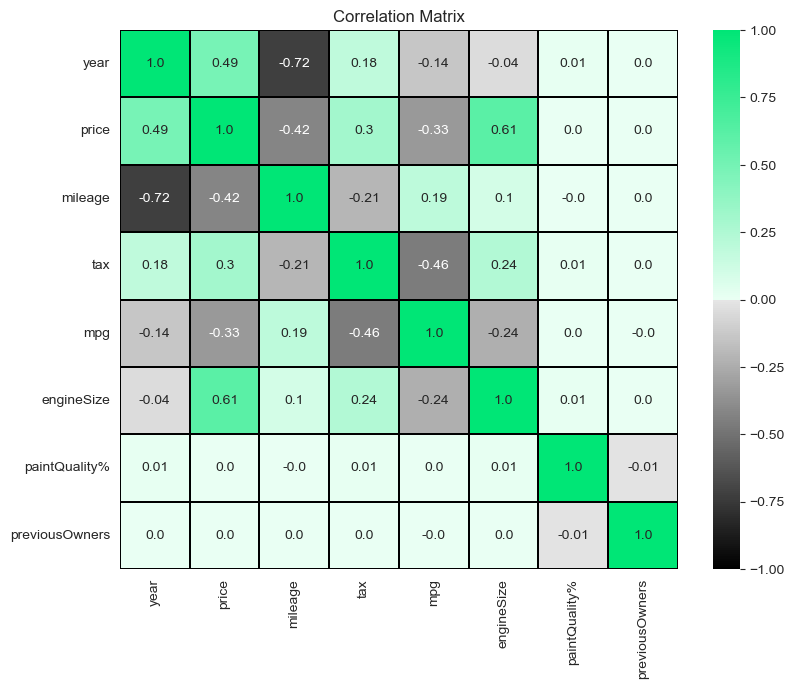

In [90]:
num = df_train_new.select_dtypes(include="number").drop(columns=["carID"], errors="ignore")
corr = num.corr(numeric_only=True).round(2)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

The matrix shows that **car prices** are **positively** related to `engine size` and `year`, and **negatively** related to `mileage`.
Some variables, such as `paintQuality%` and `previousOwners`, do not appear to have a **significant linear relationship** and may be less important for the regression model.

<h2 style="color: #00E676;">2.5. Feature Engenering</h2>

In [91]:
df_train_new.head()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,brand_model_clean,model_clean_fuzzy,mpg_capped_bmw
0,69512,2016.0,22290,28421.0,145.0,11.42,2.0,63.0,4,vw,petrol,semi-auto,vw_golf,golf,False
1,53000,2019.0,13790,4589.0,145.0,47.90,1.5,50.0,1,toyota,petrol,manual,toyota_yaris,yaris,False
2,6366,2019.0,24990,3624.0,145.0,40.90,1.5,56.0,4,audi,petrol,semi-auto,audi_q2,q2,False
3,29021,2018.0,12500,9102.0,145.0,65.70,1.0,50.0,2,ford,petrol,manual,ford_fiesta,fiesta,False
4,10062,2019.0,22995,1000.0,145.0,42.80,1.5,97.0,3,bmw,petrol,manual,bmw_2 series,2 series,False


**Car age**

In [92]:
df_train_new["Age"] = 2025 - df_train_new["year"]

**Annual usage**

In [93]:
df_train_new["Mile_per_year"] = ((df_train_new["mileage"] / (df_train_new["Age"] + 1)).round(2))

**Premium brand**

In [94]:
df_train_new["is_premium"] = df_train_new["Brand_clean"].isin({"bmw","audi","mercedes"}).astype("int8")

**Automatic transmission**

In [95]:
df_train_new["is_auto"] = df_train_new["transmission_clean"].isin({"Automatic","Semi-Auto"}).astype("int8")

**Electric or hybrid**

In [96]:
df_train_new["is_elec_hybrid"] = df_train_new["fuelType_clean"].isin({"Electric","Hybrid"}).astype("int8")

**Fuel consumption**

In [97]:
df_train_new["l_100km"] = 235.214583 / df_train_new["mpg"]

In [98]:
df_train_new.head()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,...,transmission_clean,brand_model_clean,model_clean_fuzzy,mpg_capped_bmw,Age,Mile_per_year,is_premium,is_auto,is_elec_hybrid,l_100km
0,69512,2016.0,22290,28421.0,145.0,11.42,2.0,63.0,4,vw,...,semi-auto,vw_golf,golf,False,9.0,2842.10,0,0,0,20.596724
1,53000,2019.0,13790,4589.0,145.0,47.90,1.5,50.0,1,toyota,...,manual,toyota_yaris,yaris,False,6.0,655.57,0,0,0,4.910534
2,6366,2019.0,24990,3624.0,145.0,40.90,1.5,56.0,4,audi,...,semi-auto,audi_q2,q2,False,6.0,517.71,1,0,0,5.750968
3,29021,2018.0,12500,9102.0,145.0,65.70,1.0,50.0,2,ford,...,manual,ford_fiesta,fiesta,False,7.0,1137.75,0,0,0,3.580131
4,10062,2019.0,22995,1000.0,145.0,42.80,1.5,97.0,3,bmw,...,manual,bmw_2 series,2 series,False,6.0,142.86,1,0,0,5.495668


In [99]:
df_train_new.columns

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'paintQuality%', 'previousOwners', 'Brand_clean', 'fuelType_clean',
       'transmission_clean', 'brand_model_clean', 'model_clean_fuzzy',
       'mpg_capped_bmw', 'Age', 'Mile_per_year', 'is_premium', 'is_auto',
       'is_elec_hybrid', 'l_100km'],
      dtype='object')

<h2 style="color: #00E676;">2.6. Data scaling</h2>

In [100]:
X = df_train_new.drop('price', axis= 1)
y = df_train_new['price']

In [101]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42
                                                )

In [102]:
X_train_num = X_train.select_dtypes(include=np.number).drop(
    ["is_premium", "is_auto", "is_elec_hybrid"], axis=1)
X_train_cat = X_train.select_dtypes(exclude=np.number).join(df_train_new[["is_premium", "is_auto", "is_elec_hybrid"]])


X_val_num = X_val.select_dtypes(include=np.number).drop(
    ["is_premium", "is_auto", "is_elec_hybrid"], axis=1)

X_val_cat = X_val.select_dtypes(exclude=np.number).join(df_train_new[["is_premium", "is_auto", "is_elec_hybrid"]])


In [103]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num) 
X_val_num_scaled = scaler.transform(X_val_num) 
X_train_num_scaled

array([[0.47399666, 0.875     , 0.05323546, ..., 0.125     , 0.07944619,
        0.01328936],
       [0.56047702, 0.70833333, 0.17505627, ..., 0.29166667, 0.1808572 ,
        0.01290575],
       [0.38437035, 0.875     , 0.09900959, ..., 0.125     , 0.14775445,
        0.01604306],
       ...,
       [0.24340867, 0.95833333, 0.01129725, ..., 0.04166667, 0.02167999,
        0.01445415],
       [0.50712772, 0.875     , 0.08338726, ..., 0.125     , 0.12444157,
        0.01211312],
       [0.57822064, 0.91666667, 0.05291657, ..., 0.08333333, 0.08884145,
        0.01211312]])

In [104]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train_num.index)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val_num.index)
X_train_num_scaled.head()

,carID,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Age,Mile_per_year,l_100km
28093,0.473997,0.875000,0.053235,0.250000,0.241298,0.318182,0.763766,0.500000,0.125000,0.079446,0.013289
49775,0.560477,0.708333,0.175056,0.250000,0.246774,0.318182,0.506990,0.666667,0.291667,0.180857,0.012906
63415,0.384370,0.875000,0.099010,0.258621,0.208056,0.181818,0.722682,0.000000,0.125000,0.147754,0.016043
3529,0.770399,0.875000,0.080493,0.250000,0.204145,0.303030,0.445364,0.166667,0.125000,0.120122,0.016425
10148,0.792724,0.916667,0.034879,0.215517,0.165819,0.212121,0.691869,0.666667,0.083333,0.058560,0.021094


# <h2 style="color: #00E676;">3 Feature Selection</h2>

First approach here is to decide what **feature selection methods** we are going to use. For this we need to take in consideration what type of **target variable** we have. Because it is a **numerical variable** we are going to use for **categorical data** we will use
the **ANOVA filter method** when it comes to numerical data we will use both **Pearson** and **Spearman's**.

<h3 style="color: #00E676;">3.1 Removing CarID</h3>

In [105]:
X_train_num_scaled = X_train_num_scaled.drop(columns=['carID'])
X_val_num_scaled = X_val_num_scaled.drop(columns=['carID'])
X_train_num_scaled.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Age,Mile_per_year,l_100km
28093,0.875000,0.053235,0.250000,0.241298,0.318182,0.763766,0.500000,0.125000,0.079446,0.013289
49775,0.708333,0.175056,0.250000,0.246774,0.318182,0.506990,0.666667,0.291667,0.180857,0.012906
63415,0.875000,0.099010,0.258621,0.208056,0.181818,0.722682,0.000000,0.125000,0.147754,0.016043
3529,0.875000,0.080493,0.250000,0.204145,0.303030,0.445364,0.166667,0.125000,0.120122,0.016425
10148,0.916667,0.034879,0.215517,0.165819,0.212121,0.691869,0.666667,0.083333,0.058560,0.021094


Removed variable CarID because it provides 0 information

In [106]:
X_train_cat.head()

,Brand_clean,fuelType_clean,transmission_clean,brand_model_clean,model_clean_fuzzy,mpg_capped_bmw,is_premium,is_auto,is_elec_hybrid
28093,mercedes,diesel,manual,mercedes_a class,a class,False,1,0,0
49775,mercedes,diesel,automatic,mercedes_c class,c class,False,1,0,0
63415,ford,petrol,manual,ford_fiesta,fiesta,False,0,0,0
3529,nan,diesel,manual,nan_insignia,insignia,False,0,0,0
10148,opel,nan,manual,opel_nan,nan,False,0,0,0


<h3 style="color: #00E676;">3.2 Removing features with low Variance</h3>

In [107]:
X_train_num_scaled.var()

year              0.008101
mileage           0.004479
tax               0.011798
mpg               0.002976
engineSize        0.007395
paintQuality%     0.043980
previousOwners    0.056033
Age               0.008101
Mile_per_year     0.006005
l_100km           0.000147
dtype: float64

Highest Variance (Most Variable):

<p>previousOwners (0.056220) - Most variation in the data</p>
<p>paintQuality% (0.043816) - Second most variable</p>
<p>tax (0.011791)</p>

Lowest Variance (Most Uniform):

<p>l_100km (0.000151) - Almost constant, very little variation</p>
<p>mpg (0.000753) - Also quite uniform</p>





Low variance features may not be useful for modeling because they don't distinguish between observations well

<h3 style="color: #00E676;">3.3 Categorical Features - f_regression</h3>

In [108]:
X_cat = X_train_cat[['Brand_clean', 'model_clean_fuzzy', 'transmission_clean', 'fuelType_clean','is_premium', 'is_auto', 'is_elec_hybrid']]
Y_cat = y_train

X_num = X_train_num_scaled
y_num_train = y_train   
y_num_val = y_val             


In [109]:
X_cat_encoded = pd.get_dummies(X_cat)

In [110]:
f_statistic, p_values = f_regression(X_cat_encoded, y_train)

In [111]:
cat_results = pd.DataFrame({
    'Feature': X_cat_encoded.columns,
    'F_statistic': f_statistic,
    'p_value': p_values
})

# sort 
cat_results.sort_values(by='F_statistic', ascending=False, inplace=True)
cat_results.head(300)

,Feature,F_statistic,p_value
224,transmission_clean_manual,20121.464202,0.000000
0,is_premium,17090.313372,0.000000
227,transmission_clean_semi-auto,10401.085688,0.000000
7,Brand_clean_mercedes,6434.409806,0.000000
9,Brand_clean_opel,3520.068803,0.000000
...,...,...,...
68,model_clean_fuzzy_edg,0.000124,0.991107
125,model_clean_fuzzy_m class,0.000105,0.991841
58,model_clean_fuzzy_cl clas,0.000050,0.994367
1,is_auto,0.000000,1.000000


The `ANOVA F-test` (via f_regression) revealed that all **encoded categorical variables** exhibited statistically **significant relationships** with the **target variable** (`price`), with p-values **approaching zero**. Features such as `transmission_clean_manual`, `is_premium`, and `Brand_clean_mercedes` obtained the highest F-statistics. These results suggest that `transmission type`, `premium status`, and `brand` are key determinants of vehicle price. However, as this method evaluates each feature independently, further analysis is recommended..

<h2 style="color: #00E676;">3.4 Numeric Features </h2>

<h3 style="color: #00E676;">3.4.1 Spearman </h3>

In [112]:
df_corr = X_num.copy()
corr_spearman =  df_corr.corr(method ='spearman').round(2)
corr_spearman

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Age,Mile_per_year,l_100km
year,1.00,-0.80,0.32,-0.30,-0.03,0.01,-0.00,-1.00,-0.70,0.30
mileage,-0.80,1.00,-0.26,0.31,0.10,-0.00,0.01,0.80,0.99,-0.31
tax,0.32,-0.26,1.00,-0.53,0.14,0.01,-0.00,-0.32,-0.23,0.53
mpg,-0.30,0.31,-0.53,1.00,-0.19,0.00,0.00,0.30,0.31,-1.00
engineSize,-0.03,0.10,0.14,-0.19,1.00,0.00,0.01,0.03,0.10,0.19
paintQuality%,0.01,-0.00,0.01,0.00,0.00,1.00,-0.00,-0.01,-0.00,-0.00
previousOwners,-0.00,0.01,-0.00,0.00,0.01,-0.00,1.00,0.00,0.01,-0.00
Age,-1.00,0.80,-0.32,0.30,0.03,-0.01,0.00,1.00,0.70,-0.30
Mile_per_year,-0.70,0.99,-0.23,0.31,0.10,-0.00,0.01,0.70,1.00,-0.31
l_100km,0.30,-0.31,0.53,-1.00,0.19,-0.00,-0.00,-0.30,-0.31,1.00


In [113]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,7),dpi=100)
    cmap = LinearSegmentedColormap.from_list("black_to_green",
        [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
    )
    norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
    sns.heatmap(
        cor,
        annot= True,
        fmt="", 
        cmap=cmap,
        linecolor="black",
        linewidths=0.1,
        norm = norm,
    )
    plt.title("Correlation Matrix")
    plt.show()

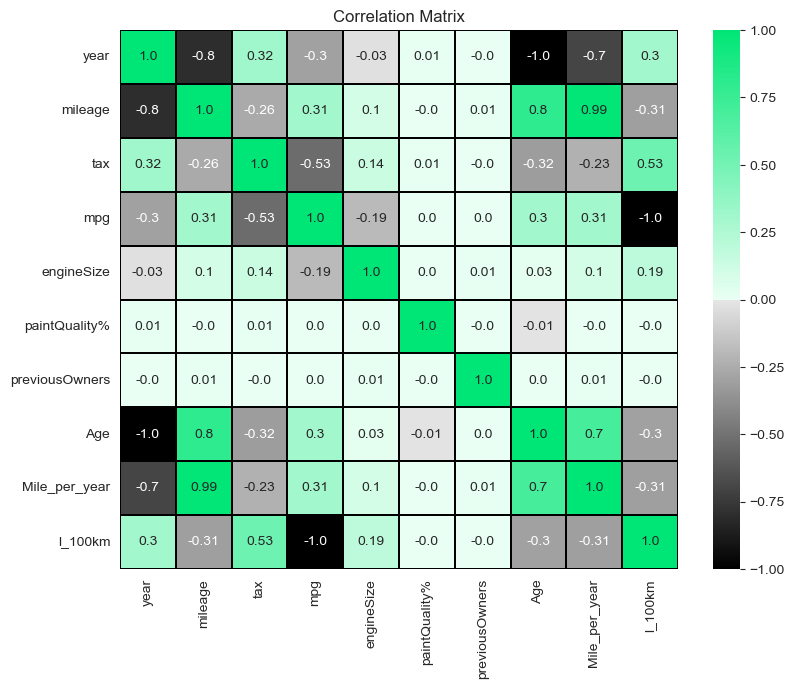

In [114]:
cor_heatmap(corr_spearman)

We can clearly observe that the **features** `paintQuality` and `previousOwners` have very **low correlation** with all the **features** including target

To make a decision we used a threshold of 0.35+ to evaluate a good correlation

<h3 style="color: #00E676;">3.4.2 Pearson </h3>

In [115]:
scores = r_regression(X_num, y_train)

In [116]:
pd.Series(scores, index=X_num.columns)

year              0.487776
mileage          -0.417534
tax               0.293461
mpg              -0.331432
engineSize        0.617163
paintQuality%     0.003621
previousOwners    0.001499
Age              -0.487776
Mile_per_year    -0.379332
l_100km           0.228500
dtype: float64

In [117]:
X_train_num

,carID,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Age,Mile_per_year,l_100km
28093,36011,2017.0,17196.0,145.0,62.8,2.1,76.0,3,8.0,1910.67,3.745455
49775,42581,2013.0,56544.0,145.0,64.2,2.1,51.0,4,12.0,4349.54,3.663779
63415,29202,2017.0,31981.0,150.0,54.3,1.2,72.0,0,8.0,3553.44,4.331760
3529,58529,2017.0,26000.0,145.0,53.3,2.0,45.0,1,8.0,2888.89,4.413032
10148,60225,2018.0,11267.0,125.0,43.5,1.4,69.0,4,7.0,1408.38,5.407232
...,...,...,...,...,...,...,...,...,...,...,...
38121,66494,2019.0,3149.0,145.0,48.7,1.0,35.0,1,6.0,449.86,4.829868
6408,70046,2016.0,13097.0,20.0,62.8,1.0,85.0,0,9.0,1309.70,3.745455
56242,18493,2019.0,3650.0,145.0,58.9,1.0,82.0,2,6.0,521.43,3.993456
880,38528,2017.0,26935.0,20.0,67.3,2.1,87.0,4,8.0,2992.78,3.495016


We observe **low levels** again for `paintQuality` and `previousOwners`

<h3 style="color: #00E676;">3.4.3 RFE with Linear Regression </h3>

In [118]:
number_of_features = np.arange(1, len(X_num.columns)+1)
high_score = 0
nof = 0
train_score_list = []
val_score_list = []


for n in number_of_features:
    estimator = LinearRegression()
    rfe = RFE(estimator, n_features_to_select=n)
    x_train_rfe= rfe.fit_transform(X_train_num_scaled, y_train)
    x_val_rfe = rfe.transform(X_val_num_scaled)
    estimator.fit(x_train_rfe, y_train)
    
    train_score = estimator.score(x_train_rfe, y_train)
    train_score_list.append(train_score)
    
    val_score = estimator.score(x_val_rfe, y_val)
    val_score_list.append(val_score)
    
    
    if (val_score >= high_score):
        high_score = val_score
        nof = n
        features_to_select = pd.Series(rfe.support_, index=X_num.columns)

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select[features_to_select==True].index.tolist()}")

Optimum number of features: 9
Score with 9 features: 0.681390
Features to select: 
['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'Age', 'Mile_per_year', 'l_100km']


<hr>

### Numerical Data

| Predictor      | Spearman | Pearson  | RFE     | Decision               |
| -------------- | -------- | -------- | ------- | ---------------------- |
| `year`           | Keep     | Keep     | Keep    | Include in the model   |
| `mileage`        | Keep     | Keep     | Keep    | Include in the model   |
| `tax`            | Keep?    | Discard? | Keep    | Try with and without   |
| `mpg`            | Keep     | Keep?    | Keep    | Include in the model   |
| `engineSize`    | Keep     | Keep     | Keep    | Include in the model   |
| `paintQuality%`  | Discard  | Discard  | Discard | Discard from the model |
| `previousOwners` | Discard  | Discard  | Discard | Discard from the model |
| `Age`            | Keep     | Keep     | Keep    | Include in the model   |
| `Mile_per_year`  | Keep     | Keep     | Keep    | Include in the model   |
| `l_100_km`       | Keep     | Discard? | Keep    | Try with and without   |


<hr>


### Categorical Data

| Predictor | ANOVA - f_regression | 
| --- | --- | 
| `fuelType_clean` | Keep |  
| `Brand_clean` | Keep | 
| `Model_clean_fuzzy`| Keep|
| `transmission_clean`| Keep|
| `is_premium` | Keep |
| `is_auto` | Discard |
| `is_elec_hybrid` | Discard |

<hr>

<h1 style="color: #00E676;">Predictive Modeling </h1>

<h3 style="color: #00E676;"> Multiple Linear Regression </h3

We choose the **Multiple Linear Regression model** because the objective of this analysis is to **predict** a continuous numerical variable, the car price, based on several **independent features**, both **numerical** and **categorical**.

In [119]:
df_train_new.columns

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'paintQuality%', 'previousOwners', 'Brand_clean', 'fuelType_clean',
       'transmission_clean', 'brand_model_clean', 'model_clean_fuzzy',
       'mpg_capped_bmw', 'Age', 'Mile_per_year', 'is_premium', 'is_auto',
       'is_elec_hybrid', 'l_100km'],
      dtype='object')

<h3 style="color: #00E676;"> Using all features </h3

In [120]:
main_numeric_features= ["year", "mileage", "mpg","engineSize","Age","Mile_per_year"]  

optional_numeric = [
    "tax",
    "l_100km"
]

numeric_features = main_numeric_features + optional_numeric

categorical_features = ["fuelType_clean","Brand_clean", "model_clean_fuzzy", "transmission_clean", "is_premium"]

y = df_train_new["price"]
X = df_train_new[numeric_features + categorical_features]


print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
X.head()

Shape de X: (74122, 13)
Shape de y: (74122,)


,year,mileage,mpg,engineSize,Age,Mile_per_year,tax,l_100km,fuelType_clean,Brand_clean,model_clean_fuzzy,transmission_clean,is_premium
0,2016.0,28421.0,11.42,2.0,9.0,2842.10,145.0,20.596724,petrol,vw,golf,semi-auto,0
1,2019.0,4589.0,47.90,1.5,6.0,655.57,145.0,4.910534,petrol,toyota,yaris,manual,0
2,2019.0,3624.0,40.90,1.5,6.0,517.71,145.0,5.750968,petrol,audi,q2,semi-auto,1
3,2018.0,9102.0,65.70,1.0,7.0,1137.75,145.0,3.580131,petrol,ford,fiesta,manual,0
4,2019.0,1000.0,42.80,1.5,6.0,142.86,145.0,5.495668,petrol,bmw,2 series,manual,1


This code selects and organizes **all the variables** (both numerical and categorical) that will be used as inputs (X) to predict the price (y), preparing the data for the next phase.

<h4 style="color: #00E676;"> Data partition </h4

In [121]:
X_train, X_test ,y_train , y_test = train_test_split (X,y,
                                                      test_size= 0.3, random_state=42)

print(X_train.shape, X_test.shape) 

(51885, 13) (22237, 13)


The dataset was divided into **training** (70%) and **validation** (30%) sets using the `train_test_split()` function. The independent variables were defined as X, and the dependent variable `price` as y. A **random_state** of 42 was used to ensure the reproducibility of the split.

<h4 style="color: #00E676;"> Fit the model </h4

In [122]:
#numerical Features
X_train_num = X_train[numeric_features].copy()
X_test_num  = X_test[numeric_features].copy()
    
#Categorical Features

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ohe.fit(X_train[categorical_features])

X_train_cat = pd.DataFrame(
    ohe.transform(X_train[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_test.index
)

    
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)
    
minmax = MinMaxScaler()
X_train_final[numeric_features] = minmax.fit_transform(X_train_final[numeric_features])
X_test_final[numeric_features]  = minmax.transform(X_test_final[numeric_features])

Before training the model, the dataset was preprocessed to ensure that all **variables** were in a **suitable format** for **regression** analysis.
Missing values in the numerical features were replaced using the median strategy, while **categorical variables** were converted into **dummy variables** using One-Hot Encoding.

In [123]:
lin_model = LinearRegression()

In [124]:
lin_model.fit(X_train_final, y_train)

LinearRegression()

In [125]:
predictions = lin_model.predict(X_test_final)
predictions

array([ 5138.20367465, 27929.4532996 , 11376.28108774, ...,
       22680.10967597, 10341.41943053, 22919.93381651])

In [126]:
val_results = pd.DataFrame({
    'y_true': y_test.values.flatten(),
    'y_pred': predictions.flatten()
}, index=y_test.index)

val_results.head()


,y_true,y_pred
39218,6991,5138.203675
71167,27679,27929.453300
2034,11990,11376.281088
4916,15382,17307.068252
11650,20490,23007.083340


A DataFrame `val_results` was created to **compare** the actual values (y_true) with the **predicted values** (y_pred) from the test set.
Viewing the first rows helps quickly assess how well the **model predicts** the target variable.

In [127]:
# Training metrics 
y_pred_train = lin_model.predict(X_train_final)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))


print("TRAINING METRICS")
print(f"R² : {r2_train:.4f}")
print(f"MAE : {mae_train:.4f}")
print(f"RMSE: {rmse_train:.2f}")

TRAINING METRICS
R² : 0.8415
MAE : 2369.9596
RMSE: 3891.61


The model’s performance on the training set was evaluated using the metrics `R²`, `MAE`, and `RMSE`. An `R²` of **0.8415** indicates that the model explains about **84.2%** of the variability in the training data, showing a good fit. The relatively low `MAE` (**≈2369€**) and `RMSE` (**≈3891€**) confirm that the model’s predictions are close to the actual values.

In [128]:
# Validation metrics 
r2_val = r2_score(y_test, predictions)
mae_val = mean_absolute_error(y_test, predictions)
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))

print("VALIDATION METRICS:")
print(f'R²: {r2_val:.4f}')
print(f'MAE: {mae_val:.4f}')
print(f"RMSE: {rmse_test:.2f}")

VALIDATION METRICS:
R²: 0.8263
MAE: 2389.4795
RMSE: 4024.73


The model’s performance on the validation set was assessed using `R²`, `MAE`, and `RMSE`. An `R²` of **0.8263** indicates that the model explains about **82%** of the variance in unseen data, showing strong generalization. The low `MAE` (**≈2389€**) and `RMSE` (**≈4024€**) confirm that prediction errors remain small and consistent with the training results, suggesting no significant overfitting.

<h4 style="color: #00E676;"> Evaluate the model </h4

In [129]:
lin_model.coef_

array([ 2.14248819e+04,  2.74745025e+04, -1.23440955e+04,  3.65169496e+04,
       -2.14248819e+04, -4.29364662e+04, -5.26266927e+03,  1.60825567e+04,
       -5.88064233e+02, -6.09017197e+03,  3.30701005e+03,  4.30964153e+02,
        1.95367390e+03,  9.86588106e+02,  9.26998664e+02, -7.50700722e+02,
        2.75933792e+02, -1.43179292e+03,  1.03655018e+03,  1.09054520e+03,
       -1.16430704e+03, -1.90688347e+02, -9.77233795e+02,  1.18469500e+03,
       -4.99408274e+03, -4.68599233e+03, -6.53096558e+03,  8.12909620e+03,
       -2.30337087e+03, -2.82678883e+03, -7.80794046e+02, -6.98235618e+02,
        7.15075038e+03,  2.32625709e+04, -3.86431276e+03, -3.93288923e+03,
       -6.32633514e+03,  4.75805535e+03, -4.28225196e+03, -3.92585626e+03,
       -2.02698577e+03, -1.51493584e+03,  4.18386686e+01,  2.93374060e+03,
       -7.47654821e+03, -3.24856208e+03,  5.80811033e+02,  1.38823384e+04,
       -2.90191434e+03, -3.42790805e+02, -7.61110446e+03, -5.52293249e+03,
       -5.31677373e+03, -

In [130]:
coefs_df = (
    pd.DataFrame({
        'Variable': X_train_final.columns,
        'Coefficient': lin_model.coef_.flatten()
    })
    .assign(abs_value=lambda d: d['Coefficient'].abs())  
    .sort_values('abs_value', ascending=False)
)

coefs_df.head()

,Variable,Coefficient,abs_value
160,model_clean_fuzzy_r8,56703.481340,56703.481340
5,Mile_per_year,-42936.466173,42936.466173
116,model_clean_fuzzy_i8,37575.964875,37575.964875
3,engineSize,36516.949616,36516.949616
223,model_clean_fuzzy_x7,34813.314372,34813.314372


In [131]:
float(lin_model.intercept_)

1657.9012736165569

The **intercept value** (≈21,642€) represents the baseline **average price** for the reference group — that is, a car with average or zero values for all numerical variables and belonging to the base categories of the categorical variables (those omitted after One-Hot Encoding).

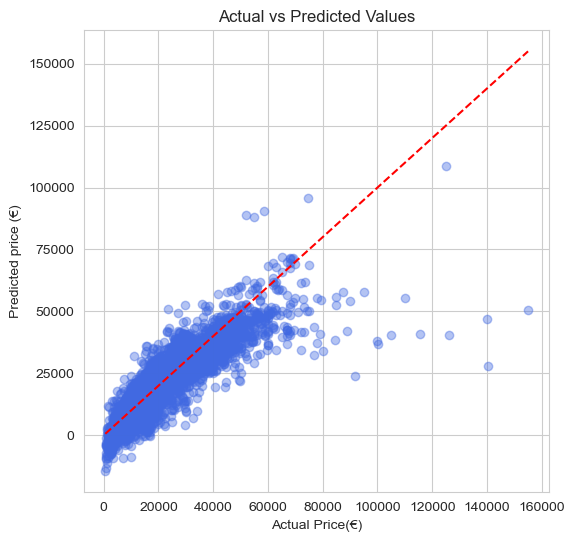

In [132]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions, alpha=0.4, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price(€)")
plt.ylabel("Predicted price (€)")
plt.title("Actual vs Predicted Values")
plt.show()

The **scatter plot** illustrates the **relationship** between the **real car prices** and the **predicted prices** obtained from the **multiple linear** regression model. Most **data points** are clustered close to the **red dashed line** (y = x), showing that the model **predicts prices** with **good accuracy** and **low error** for the majority of vehicles. However, a **few points** deviate further from the line, particularly at **higher price ranges** (above €70,000), indicating that the model tends to be less precise for **luxury** or **high-end cars**, where price variability is greater.

<h3 style="color: #00E676;"> Without optional features </h3

In [133]:
main_numeric_features= ["year", "mileage", "mpg","engineSize","Age","Mile_per_year"]   
categorical_features = ["fuelType_clean","Brand_clean", "model_clean_fuzzy", "transmission_clean", "is_premium"]

y = df_train_new["price"]
X = df_train_new[main_numeric_features + categorical_features]


print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
X.head()

Shape de X: (74122, 11)
Shape de y: (74122,)


,year,mileage,mpg,engineSize,Age,Mile_per_year,fuelType_clean,Brand_clean,model_clean_fuzzy,transmission_clean,is_premium
0,2016.0,28421.0,11.42,2.0,9.0,2842.10,petrol,vw,golf,semi-auto,0
1,2019.0,4589.0,47.90,1.5,6.0,655.57,petrol,toyota,yaris,manual,0
2,2019.0,3624.0,40.90,1.5,6.0,517.71,petrol,audi,q2,semi-auto,1
3,2018.0,9102.0,65.70,1.0,7.0,1137.75,petrol,ford,fiesta,manual,0
4,2019.0,1000.0,42.80,1.5,6.0,142.86,petrol,bmw,2 series,manual,1


In [134]:
X_train, X_test ,y_train , y_test = train_test_split (X,y,
                                                     test_size= 0.3,
                                                     random_state=42)
print(X_train.shape, X_test.shape)

(51885, 11) (22237, 11)


In [135]:
#Numeric Features
X_train_num = X_train[main_numeric_features].copy()
X_test_num  = X_test[main_numeric_features].copy()
    
#Categorical Features

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ohe.fit(X_train[categorical_features])

X_train_cat = pd.DataFrame(
    ohe.transform(X_train[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_test.index
)

    
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)
    
scaler = StandardScaler()
X_train_final[main_numeric_features] = scaler.fit_transform(X_train_final[main_numeric_features])
X_test_final[main_numeric_features] = scaler.transform(X_test_final[main_numeric_features])

In [136]:
lin_model = LinearRegression()

In [137]:
lin_model.fit(X_train_final, y_train)

LinearRegression()

In [138]:
predictions = lin_model.predict(X_test_final)
predictions

array([ 4788.76774481, 28002.34071683, 11926.42705202, ...,
       22592.94230423, 10621.35382928, 23130.88911848])

In [139]:

val_results = pd.DataFrame({
    'y_true': y_test.values.flatten(),
    'y_pred': predictions.flatten()
}, index=y_test.index)

val_results.head()

,y_true,y_pred
39218,6991,4788.767745
71167,27679,28002.340717
2034,11990,11926.427052
4916,15382,17857.777461
11650,20490,23056.224605


In [140]:
# Training metrics 
y_pred_train = lin_model.predict(X_train_final)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))


print("TRAINING METRICS")
print(f"R² : {r2_train:.4f}")
print(f"MAE : {mae_train:.4f}")
print(f"RMSE: {rmse_train:.2f}")

TRAINING METRICS
R² : 0.8390
MAE : 2392.0481
RMSE: 3922.81


On the training set, the **multiple linear** regression model without the optional features achieved an `R²` of **0.8390**, meaning it explains about **83%** of the variability in car prices. The `MAE` (≈ **€2392**) and `RMSE` (≈ **€3992**) indicate that the **model’s prediction errors** are relatively **small and consistent**. These results show that the model fits the training data well, accurately capturing the **main relationships** between the predictors and the target variable.

In [141]:
# Validation metrics 
r2_val = r2_score(y_test, predictions)
mae_val = mean_absolute_error(y_test, predictions)
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))

print("VALIDATION METRICS:")
print(f'R²: {r2_val:.4f}')
print(f'MAE: {mae_val:.4f}')
print(f"RMSE: {rmse_test:.2f}")

VALIDATION METRICS:
R²: 0.8231
MAE: 2407.0114
RMSE: 4061.19


On the validation set, the model obtained an `R²` of **0.8231**, slightly lower than in training, which is expected when testing on unseen data.
The `MAE` (≈ **€2407**) and `RMSE` (≈ **€4061**) are very close to the **training errors**, demonstrating good generalization and confirming that the model is **not overfitting**. Overall, the model maintains **strong predictive performance**, effectively estimating car prices based only on the core features.

In [142]:
lin_model.coef_

array([ 1.87074117e+03,  1.55506392e+03, -6.58082724e+02,  3.06333963e+03,
       -1.87074117e+03, -3.03875773e+03, -6.26235804e+02, -5.61653378e+03,
        3.58479866e+03,  2.38254043e+02,  1.74534837e+03,  6.74368508e+02,
        9.72561501e+02, -7.48659173e+02,  2.48973489e+02, -1.53523215e+03,
        9.89643187e+02,  1.08553841e+03, -1.18609007e+03, -1.18358427e+02,
       -9.20333301e+02,  1.21195654e+03, -4.70503839e+03, -4.47187906e+03,
       -6.51767764e+03,  5.03461094e+03, -2.14854149e+03, -2.64780825e+03,
       -6.93271679e+02, -7.06462938e+02,  7.30148554e+03,  2.35283570e+04,
       -3.56841328e+03, -3.59978224e+03, -5.80817202e+03,  5.39081199e+03,
       -3.93849239e+03, -3.65268404e+03, -1.94093080e+03, -1.27858738e+03,
        3.09773023e+01,  2.92052742e+03, -7.29461353e+03, -2.71171527e+03,
       -2.30359982e+02,  1.40575378e+04, -4.26343505e+03, -1.89054410e+02,
       -7.17828590e+03, -5.34066500e+03, -4.87926342e+03, -3.45266994e+03,
       -6.87366065e+03, -

In [143]:
coefs_df = (
    pd.DataFrame({
        'Variable': X_train_final.columns,
        'Coefficient': lin_model.coef_.flatten()
    })
    .assign(abs_value=lambda d: d['Coefficient'].abs())  
    .sort_values('abs_value', ascending=False)
)

coefs_df.head(15)

,Variable,Coefficient,abs_value
158,model_clean_fuzzy_r8,56800.478319,56800.478319
114,model_clean_fuzzy_i8,37593.460173,37593.460173
221,model_clean_fuzzy_x7,35263.203221,35263.203221
61,model_clean_fuzzy_california,29383.535111,29383.535111
167,model_clean_fuzzy_rs6,24425.161759,24425.161759
31,model_clean_fuzzy_8 serie,23528.357041,23528.357041
157,model_clean_fuzzy_q8,23467.116909,23467.116909
163,model_clean_fuzzy_rs,22886.281879,22886.281879
138,model_clean_fuzzy_m5,21475.642992,21475.642992
183,model_clean_fuzzy_sq7,20147.001495,20147.001495


In [144]:
float(lin_model.intercept_)

21272.67432526994

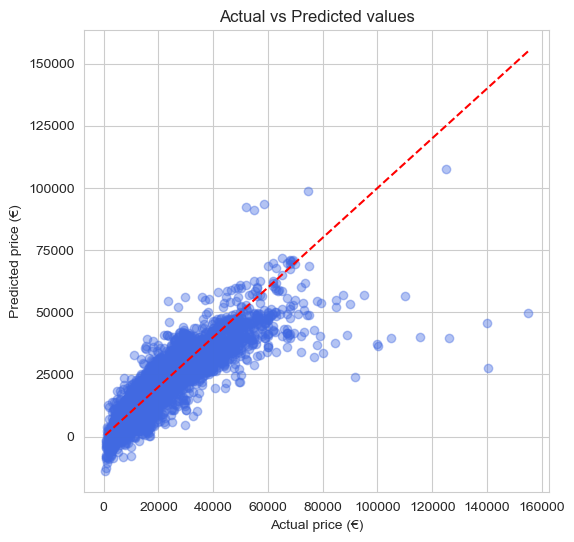

In [145]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions, alpha=0.4, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual price (€)")
plt.ylabel("Predicted price (€)")
plt.title("Actual vs Predicted values")
plt.show()


The **multiple linear regression model** without the optional features achieved an `R²` of approximately **0.82**, meaning it explains about **82%** of the **variability** in car prices. The **actual** vs **predicted** price plot shows that most observations are closely aligned with the reference line (y = x), indicating that the model performs consistently and accurately for the majority of vehicles. Despite minor deviations in higher price ranges, the model demonstrates **solid predictive performance** and **stability**, **effectively estimating** car prices using only the core features.

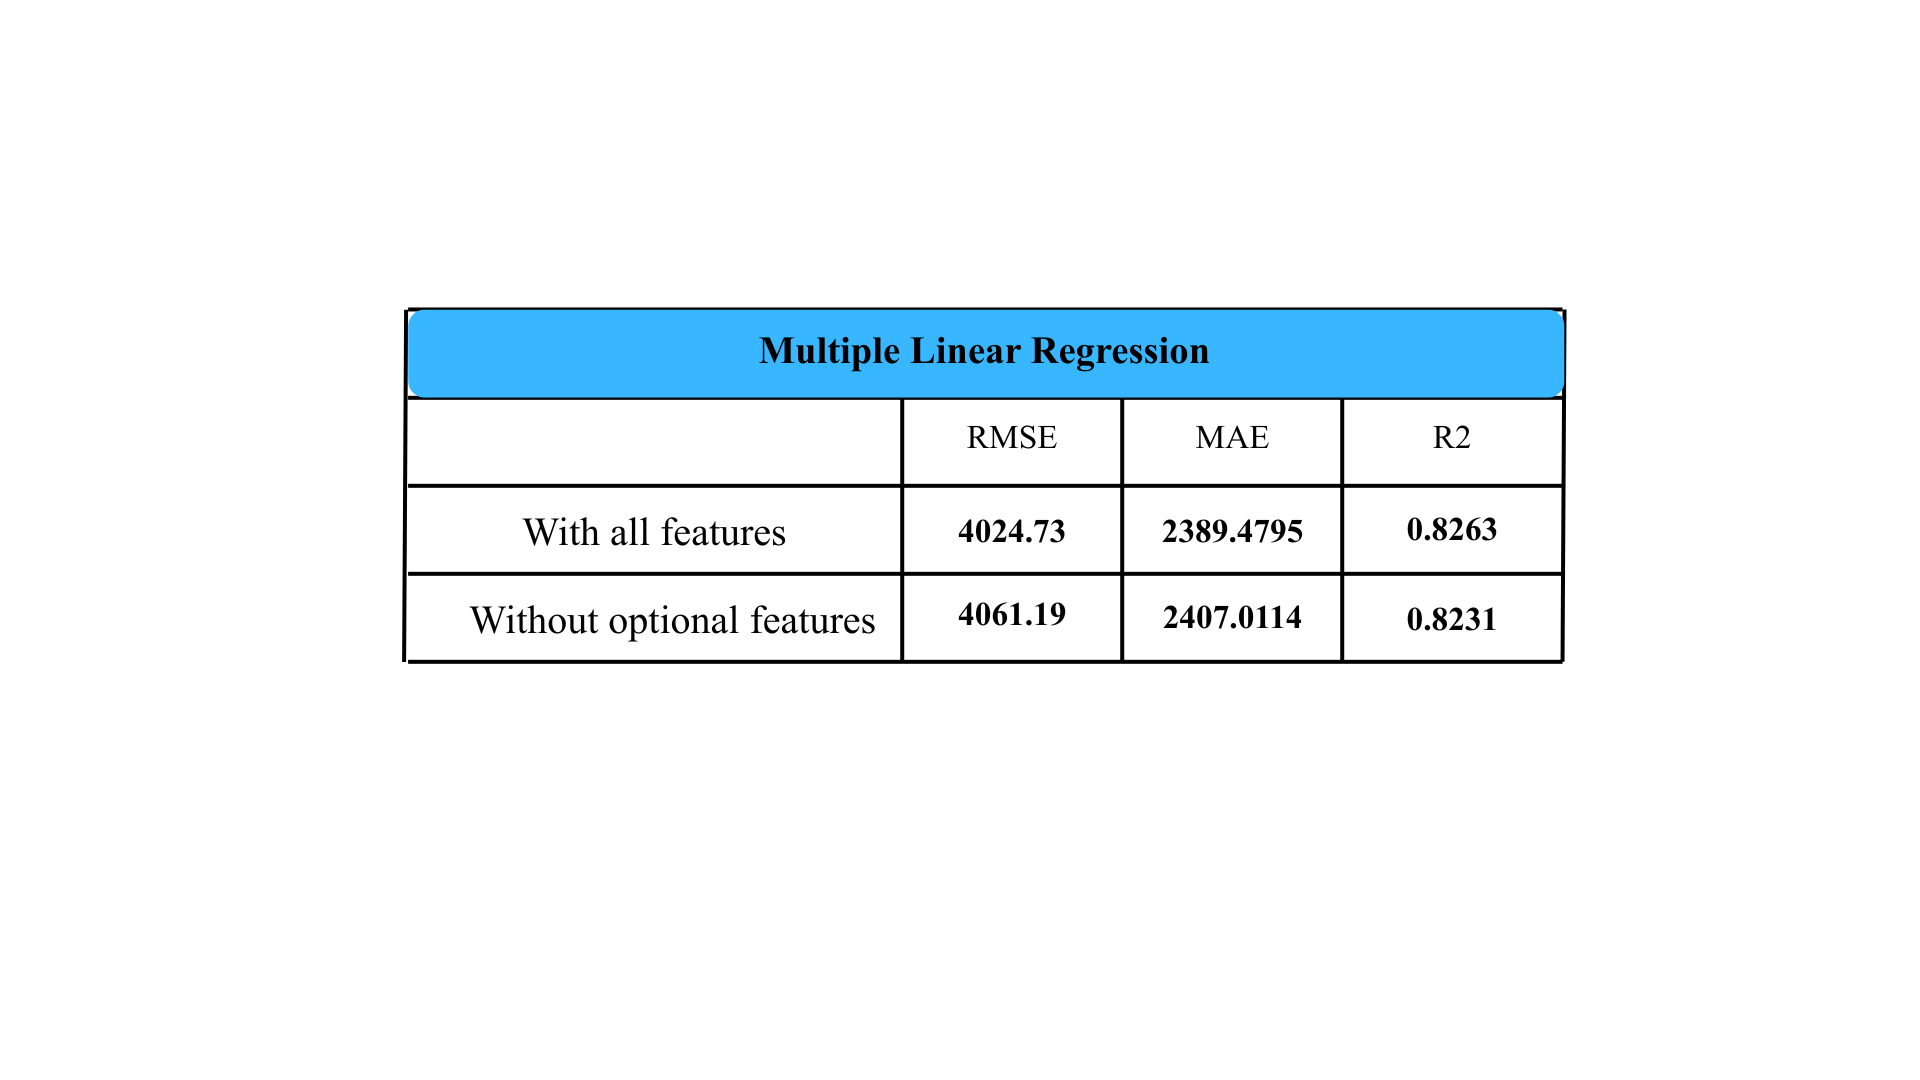

**Conclusion**:  The **multiple linear regression model** developed for Cars 4 You demonstrated solid predictive performance, achieving an `R²` of **0.8263** when using all features and **0.8231** when excluding the optional ones. These results confirm that the **model can reliably estimate** car prices based on user-provided information, effectively capturing the **relationship** between **vehicle characteristics** and **market value**. By automating the price estimation process, Cars 4 You can streamline its operations, reduce dependency on manual inspections, and offer a faster and more efficient service to potential sellers.